Disclaimer: GitHub Copilot and GPT4 were used in the solution of this assignment.

# <img src="https://img.icons8.com/bubbles/100/000000/3d-glasses.png" style="height:50px;display:inline"> EE 046746 - Technion - Computer Vision


## Homework 1 - Image Classification and Foundation Models

### <img src="https://img.icons8.com/dusk/64/000000/python.png" style="height:50px;display:inline"> Python Libraries
---

* `numpy`
* `matplotlib`
* `pytorch` (and `torchvision`)
* `opencv` (or `scikit-image`)
* `scikit-learn`
* Anything else you need (`PIL`, `os`, `pandas`, `csv`, `json`,...)

### <img src="https://img.icons8.com/bubbles/50/000000/checklist.png" style="height:50px;display:inline"> Tasks
---
* In all tasks, you should document your process and results in a report file (which will be saved as `.pdf`). 
* You can reference your code in the report file, but no need for actual code in this file, the code is submitted in a seprate folder as explained above.

#### Part 1 - Classic Classifier
---
In this part we are going to examine the performance of a classical classifier over images from the **Canadian Institute For Advanced Research (CIFAR-10)**  Dataset. 

* The CIFAR-10 dataset consists of 60,000 32x32 colour images in 10 classes, with 6,000 images per class. There are 50,000 training images and 10,000 test images.
  * There is also CIFAR-100, with 100 classes.
* The classes are completely mutually exclusive. For example, there is no overlap between automobiles and trucks. "Automobile" includes sedans, SUVs, things of that sort. "Truck" includes only big trucks. Neither includes pickup trucks.
* <a href="https://www.cs.toronto.edu/~kriz/cifar.html">Official Site</a>


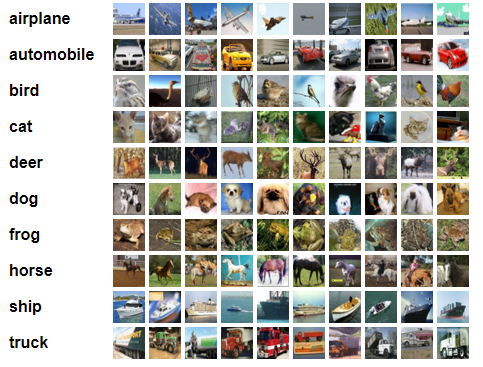


1. Load the CIFAR-10 training and test set with PyTorch (<a href="https://pytorch.org/vision/stable/generated/torchvision.datasets.CIFAR10.html#torchvision.datasets.CIFAR10">read more here</a>). Display 5 images from the training set with their labels as title.

In [1]:
import torch
import torchvision
import torchvision.transforms as transforms
import matplotlib.pyplot as plt
import numpy as np

# Load the CIFAR-10 training and test set with PyTorch
transform = transforms.Compose(
    [transforms.ToTensor()])

root = './CIFAR-10'

trainset = torchvision.datasets.CIFAR10(root, train=True,
                                        download=True, transform=transform)

trainloader = torch.utils.data.DataLoader(trainset, batch_size=4,
                                          shuffle=True, num_workers=2)

testset = torchvision.datasets.CIFAR10(root, train=False,
                                        download=True, transform=transform)

testloader = torch.utils.data.DataLoader(testset, batch_size=4,
                                          shuffle=False, num_workers=2)

In [16]:
# understand the trainset format:
print(len(trainset[0]))
print(trainset[0][1])
print(trainset[0][0].size())
print(trainset[0][0].permute(1, 2, 0).size()) # to imshow dimensions

2
6
torch.Size([3, 32, 32])
torch.Size([32, 32, 3])


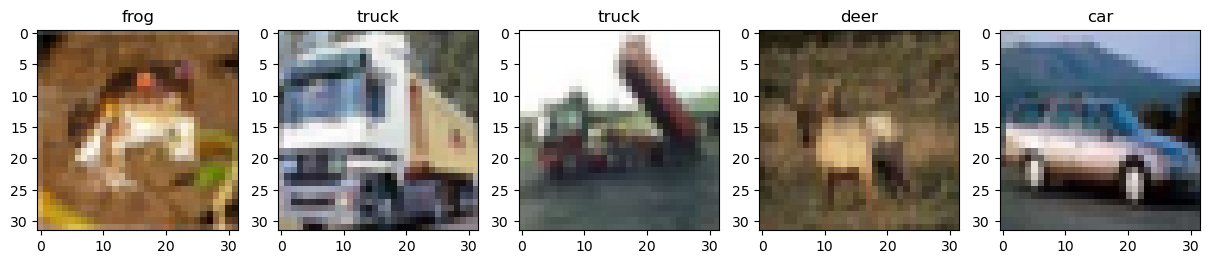

In [2]:
classes = ('plane', 'car', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck')

# display the first 5 images of trainset with their labels as the titles

plt.figure(figsize=(15, 10))
for i in range(5):
    plt.subplot(1, 5, i+1)
    plt.imshow(trainset[i][0].permute(1, 2, 0)) # permute to imshow dimensions: pixels x pixels x channels
    plt.title(classes[trainset[i][1]])

2. Build a K-Nearest Neighbors (K-NN) classifier (hint: `sklearn.neighbors.KNeighborsClassifier`), with `n_neighbors=10`, to classify CIFAR-10: Load 10,000 samples from the training set and train the model. 

  **Note**: The model's input dimension should be : `(n_samples, n_features)`, Thus you need to convert each color channel to row representation and then concatenate the 3 color channels.

In [ ]:
# build the K-NN classifier

from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix

# Load 10,000 samples from the training set
n_samples = 10000
train_data = trainset.data[:n_samples]
train_labels = trainset.targets[:n_samples]

# Convert each color channel to row representation and then concatenate the 3 color channels
train_data = train_data.reshape(train_data.shape[0], -1)

# Build the K-NN classifier
knn = KNeighborsClassifier(n_neighbors=10)
knn.fit(train_data, train_labels)

3. Load 1,000 samples from CIFAR-10 test set and check the performance of the K-NN classifier over these samples. What is the accuracy obtained? View the results using a confusion matrix(see <a href="https://towardsdatascience.com/understanding-confusion-matrix-a9ad42dcfd62">here</a> for more information)

In [9]:
# Load 1,000 samples from CIFAR-10 test set
n_samples = 1000
test_data = testset.data[:n_samples]
test_labels = testset.targets[:n_samples]

# Convert each color channel to row representation and then concatenate the 3 color channels
test_data = test_data.reshape(test_data.shape[0], -1)

# Check the performance of the K-NN classifier over these samples
preds = knn.predict(test_data)
accuracy = accuracy_score(test_labels, preds)
print(f"Accuracy: {accuracy}")

Accuracy: 0.288


In [22]:
# View the results using a confusion matrix
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix

def create_plot_confusion_matrix(predictions, truth, classes):
    # calculate the confusion matrix
    cm = confusion_matrix(truth, predictions)

    # Create a figure and axis
    fig, ax = plt.subplots(figsize=(10, 8))

    # Plot the confusion matrix
    im = ax.imshow(cm, interpolation='nearest') #, cmap=plt.cm.)

    # Add colorbar
    cbar = ax.figure.colorbar(im, ax=ax)

    # Set labels, title, and ticks
    ax.set_xlabel('Predicted')
    ax.set_ylabel('True')
    ax.set_title('Confusion Matrix')
    ax.set_xticks(np.arange(len(classes)))
    ax.set_yticks(np.arange(len(classes)))
    ax.set_xticklabels(classes, rotation=45)
    ax.set_yticklabels(classes)

    # Loop over data dimensions and create text annotations
    thresh = cm.max() / 2.
    for i in range(len(classes)):
        for j in range(len(classes)):
            ax.text(j, i, format(cm[i, j], 'd'),
                    ha="center", va="center",
                    color="white" if cm[i, j] > thresh else "black")

    # Show the figure
    plt.show()

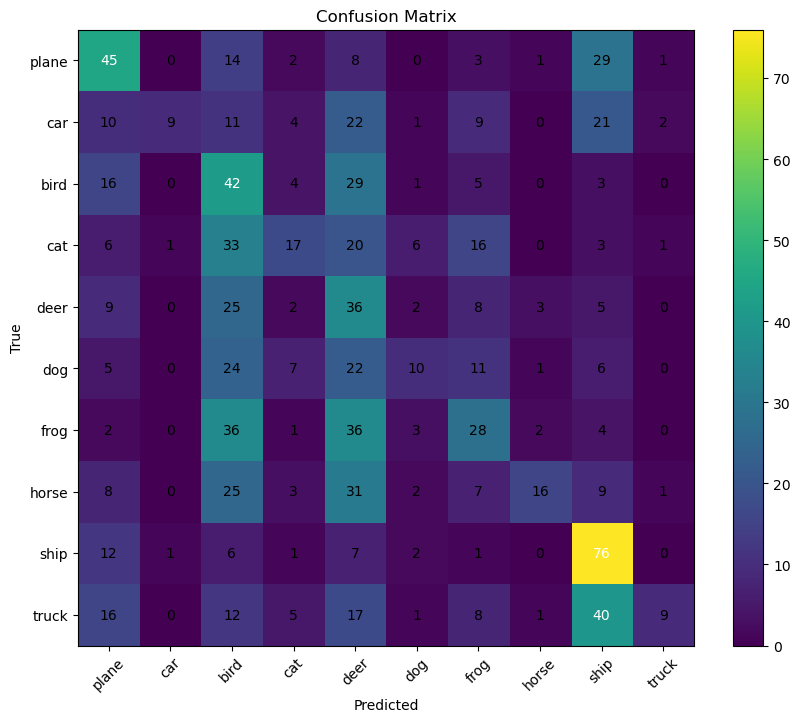

In [11]:
create_plot_confusion_matrix(preds, test_labels, classes)

4. Compare the model's accuracy for different number of neighbors ($1 \leq K \leq 30$ ). Display the results in a graph of accuracy as function of $K$.

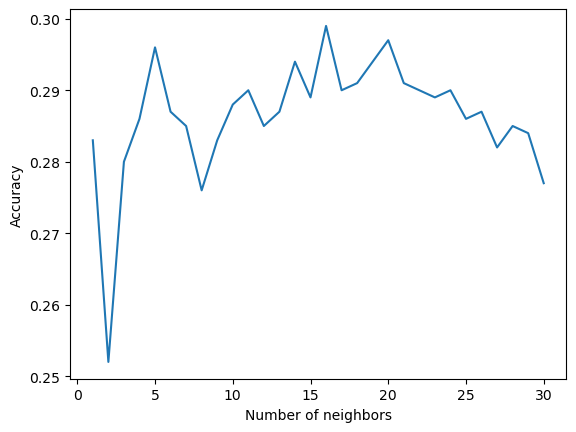

In [4]:
# Compare the model's accuracy for different number of neighbors
accuracies = []

for k in range(1, 31):
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(train_data, train_labels)
    preds = knn.predict(test_data)
    accuracy = accuracy_score(test_labels, preds)
    accuracies.append(accuracy)
    
plt.plot(range(1, 31), accuracies)
plt.xlabel('Number of neighbors')
plt.ylabel('Accuracy')
plt.show()

#### Part 2 - Design and Build a CNN Classifier
---
In this part you are going to design a deep convolutional neural network to classify CIFAR-10 dataset. 

1. Use the CNN from tutorials 3-4 , provided in the next block(`SvhnCnn()`) and train it on the CIFAR-10 dataset (**keep the architecture the same**) for the same number of **epochs** with the same learning rate (try to keep the batch size the same, but if you get memory errors, you can reduce it). What is the accuracy on the test set? What classes are most confusing for this model?
    * Your test accuracy from this section will be your **baseline** accuracy for sections 2-3.

In [17]:
# imports for the tutorial
import numpy as np
import matplotlib.pyplot as plt
import time
import os

# pytorch
import torch
import torch.nn as nn
import torchvision
import torchvision.transforms as transforms

In [18]:
# define pre-processing steps on the images
# also called "data augementation" (only done for the train set)

transform_train = transforms.Compose([
    transforms.RandomCrop(32, padding=4),
    transforms.ColorJitter(brightness=63. / 255., saturation=[0.5, 1.5], contrast=[0.2, 1.8]),
    transforms.ToTensor(),  # (almost) Always use this!
    # SVHN dataset's:     Mean - R    Mean - G   Mean - B       STD - R     STD - G     STD - B
    transforms.Normalize((0.4376821, 0.4437697, 0.47280442), (0.19803012, 0.20101562, 0.19703614)),
])

# Normalize the test set same as training set without augmentation
transform_test = transforms.Compose([
    transforms.ToTensor(),
    transforms.Normalize((0.4376821, 0.4437697, 0.47280442), (0.19803012, 0.20101562, 0.19703614)),
])


Load the data and apply the transforms given above while doing so:

In [135]:
def load_CIFAR10(batch_size=128, trainset_path=None):
    # Load the CIFAR-10 training and test set with PyTorch
    transform_train = transforms.Compose([
    transforms.RandomCrop(32, padding=4),
    transforms.ColorJitter(brightness=63. / 255., saturation=[0.5, 1.5], contrast=[0.2, 1.8]),
    transforms.ToTensor(),  # (almost) Always use this!
    # SVHN dataset's:     Mean - R    Mean - G   Mean - B       STD - R     STD - G     STD - B
    transforms.Normalize((0.4376821, 0.4437697, 0.47280442), (0.19803012, 0.20101562, 0.19703614)),
    ])

    # Normalize the test set same as training set without augmentation
    transform_test = transforms.Compose([
        transforms.ToTensor(),
        transforms.Normalize((0.4376821, 0.4437697, 0.47280442), (0.19803012, 0.20101562, 0.19703614)),
    ])

    root = './CIFAR-10'

    if trainset_path:
        trainset = torch.load(trainset_path)
    else:
        trainset = torchvision.datasets.CIFAR10(root, train=True,
                                            download=False, transform=transform_train)

    trainloader = torch.utils.data.DataLoader(trainset, batch_size=batch_size,
                                              shuffle=True, num_workers=2)

    testset = torchvision.datasets.CIFAR10(root, train=False,
                                           download=False, transform=transform_test)

    testloader = torch.utils.data.DataLoader(testset, batch_size=batch_size,
                                             shuffle=False, num_workers=2)
    
    return trainset, trainloader, testset, testloader

In [67]:
# CAUTION: overwrites the notebook session save
# import dill
# dill.dump_session('hw1_env_1.db')

If we wish to benchmark by removing the randomness in the train set, import a previously saved trainset:

In [127]:
trainset, trainloader, testset, testloader = load_CIFAR10(trainset_path='trainset.pt')

# otherwise:
# trainset, trainloader, testset, testloader = load_CIFAR10()

Save the trainset (which has indeterministic transforms - ColorJitter and RandomCrop) for reproducibility

In [31]:
# CAUTION: overwrites the dataset
torch.save(trainset, 'trainset.pt')

In [128]:
# verify we have the correct number of samples
len(trainset), len(testset)

(50000, 10000)

The model from the tutorial:

In [161]:
class SvhnCNN(nn.Module):
    """CNN for the SVHN Datset"""

    def __init__(self):
        """CNN Builder."""
        super(SvhnCNN, self).__init__()

        self.conv_layer = nn.Sequential(

            # Conv Layer block 1
            nn.Conv2d(in_channels=3, out_channels=16, kernel_size=3, padding=1),
            # What are the dims after this layer? 
            # How many weights?
            nn.BatchNorm2d(16),
            nn.ReLU(inplace=True),
            nn.Conv2d(in_channels=16, out_channels=32, kernel_size=3, padding=1),
            nn.ReLU(inplace=True),
            nn.MaxPool2d(kernel_size=2, stride=2),

            # Conv Layer block 2
            nn.Conv2d(in_channels=32, out_channels=64, kernel_size=3, padding=1),
            nn.BatchNorm2d(64),
            nn.ReLU(inplace=True),
            nn.Conv2d(in_channels=64, out_channels=64, kernel_size=3, padding=1),
            nn.ReLU(inplace=True),
            nn.MaxPool2d(kernel_size=2, stride=2),
            nn.Dropout2d(p=0.05),  # <- Why is this here?

            # Modified Conv Layer block 3
            nn.Conv2d(in_channels=64, out_channels=128, kernel_size=3, padding=1),
            nn.ReLU(inplace=True),
            nn.Conv2d(in_channels=128, out_channels=128, kernel_size=3, padding=1),
            nn.ReLU(inplace=True),
            # As we go deeper - use more channels!
        )

        self.fc_layer = nn.Sequential(
            nn.Dropout(p=0.1),
            nn.Linear(8192, 512),  # <- How do we know it's 8192? Why 512 later?
            nn.ReLU(inplace=True),
            nn.Linear(512, 10)  # <- Why 10 here?
        )


    def forward(self, x):
        """Perform forward."""
        
        # conv layers
        x = self.conv_layer(x)
        
        # flatten
        x = x.view(x.size(0), -1)
        
        # fc layer
        x = self.fc_layer(x)

        return x

Prediction function and training loop:

In [148]:
# # retrieve loss for evaluation at end of each epoch:

# model.eval()
# criterion(model(testset[0][0].to(device).unsqueeze(0)), torch.tensor(testset[0][1]).to(device).unsqueeze(0)).cpu().item() # this does the trick

0.025626985356211662

In [160]:
def predict(model, dataloader, criterion):
    device = "cuda" if torch.cuda.is_available() else "cpu"
    
    correct = 0
    total = 0
    loss = 0
    predictions = []
    truth = []

    # Initialize the progress bar
    # pbar = tqdm(total=len(dataloader), desc='Testing Progress')
    # removed because tqdm did not render properly in the notebook

    model.eval()

    with torch.no_grad():
        for data in dataloader:
            images, labels = data[0].to(device), data[1].to(device)
            outputs = model(images)
            loss += criterion(outputs, labels).cpu().item()
            _, predicted = torch.max(outputs.data, 1) # softmax preserves order, so we can use argmax here
            correct += (predicted == labels).sum().item()
            predictions.extend(predicted.cpu().numpy())
            truth.extend(labels.cpu().numpy())
            total += labels.size(0)
            # pbar.update(1)

    # Close the progress bar
    # pbar.close()

    accuracy = 100 * correct / total
    loss /= total

    model.train()

    return predictions, truth, accuracy, loss

Train loop function:

In [163]:
def train(model, trainloader, testloader, epochs, optimizer, criterion, save_path = None):

    torch.cuda.empty_cache()

    # Move the model to GPU if exists
    device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")
    print('Device:', device)
    model.to(device)

    # Total number of examples to be trained on
    total_examples = sum(data[0].size()[0] for data in trainloader)

    # Losses and accuracies over the epochs
    train_losses = []
    test_losses = []
    train_accs = []
    test_accs = []

    for epoch in range(epochs):  # loop over the dataset multiple times
        total_loss = 0.0
        # removed because tqdm did not render properly in the notebook:
        # with tqdm(trainloader, unit=" batch", total=len(trainloader), desc='Training Progress') as tepoch:
        for data in trainloader:
            # tepoch.set_description(f"Epoch {epoch+1}")
            # get the inputs; data is a list of [inputs, labels]
            inputs, labels = data[0].to(device), data[1].to(device)

            # zero the parameter gradients
            optimizer.zero_grad()

            # forward + backward + optimize
            outputs = model(inputs)
            loss = criterion(outputs, labels)
            loss.backward()
            optimizer.step()

            # print statistics
            total_loss += loss.item()

            # Update the progress bar
            # tepoch.set_postfix({'Epoch': epoch+1, 'Loss': total_loss/(i+1)})
            # tepoch.update(1)
            
        preds, truth, train_acc, train_loss = predict(model, trainloader, criterion)
        preds, truch, test_acc, test_loss = predict(model, testloader, criterion)

        train_losses.append(train_loss)
        test_losses.append(test_loss)
        train_accs.append(train_acc)
        test_accs.append(test_acc)
        
        print(f'Epoch: {epoch+1}, Train loss (over epoch): {total_loss/total_examples}, Train loss: {train_loss}, Test loss: {test_loss}, Train accuracy: {train_acc}, Test accuracy: {test_acc}')

        # close the progress bar
        # tepoch.close()

    # Save the model
    if save_path:
        torch.save(model.state_dict(), save_path)

    return train_losses, test_losses, train_accs, test_accs

Train:

In [218]:
torch.cuda.empty_cache()
torch.manual_seed(123456) # set the seed for reproducibility (this is the seed chosen when training our model, see below)
model = SvhnCNN()
optimizer = torch.optim.Adam(model.parameters(), lr=1e-4)
criterion = nn.CrossEntropyLoss()

train_losses, test_losses, train_accs, test_accs = train(model, trainloader, testloader, 20, optimizer, criterion)

Device: cuda:0
Epoch: 1, Train loss (over epoch): 0.014075463802814483, Train loss: 0.012391215410232545, Test loss: 0.01139765965938568, Train accuracy: 41.798, Test accuracy: 46.74
Epoch: 2, Train loss (over epoch): 0.011904482007026672, Train loss: 0.011126129839420318, Test loss: 0.010234904992580413, Train accuracy: 47.986, Test accuracy: 52.77
Epoch: 3, Train loss (over epoch): 0.01089143236875534, Train loss: 0.010130898456573487, Test loss: 0.009340470385551452, Train accuracy: 52.994, Test accuracy: 57.2
Epoch: 4, Train loss (over epoch): 0.010050793535709382, Train loss: 0.009381375069618225, Test loss: 0.008981908077001572, Train accuracy: 57.058, Test accuracy: 59.1
Epoch: 5, Train loss (over epoch): 0.009351691701412201, Train loss: 0.008689767236709594, Test loss: 0.008265769058465957, Train accuracy: 60.686, Test accuracy: 62.73
Epoch: 6, Train loss (over epoch): 0.008617190185785294, Train loss: 0.008284746825695037, Test loss: 0.00812586226463318, Train accuracy: 62.33

A picture of the training log:

Model training log:  
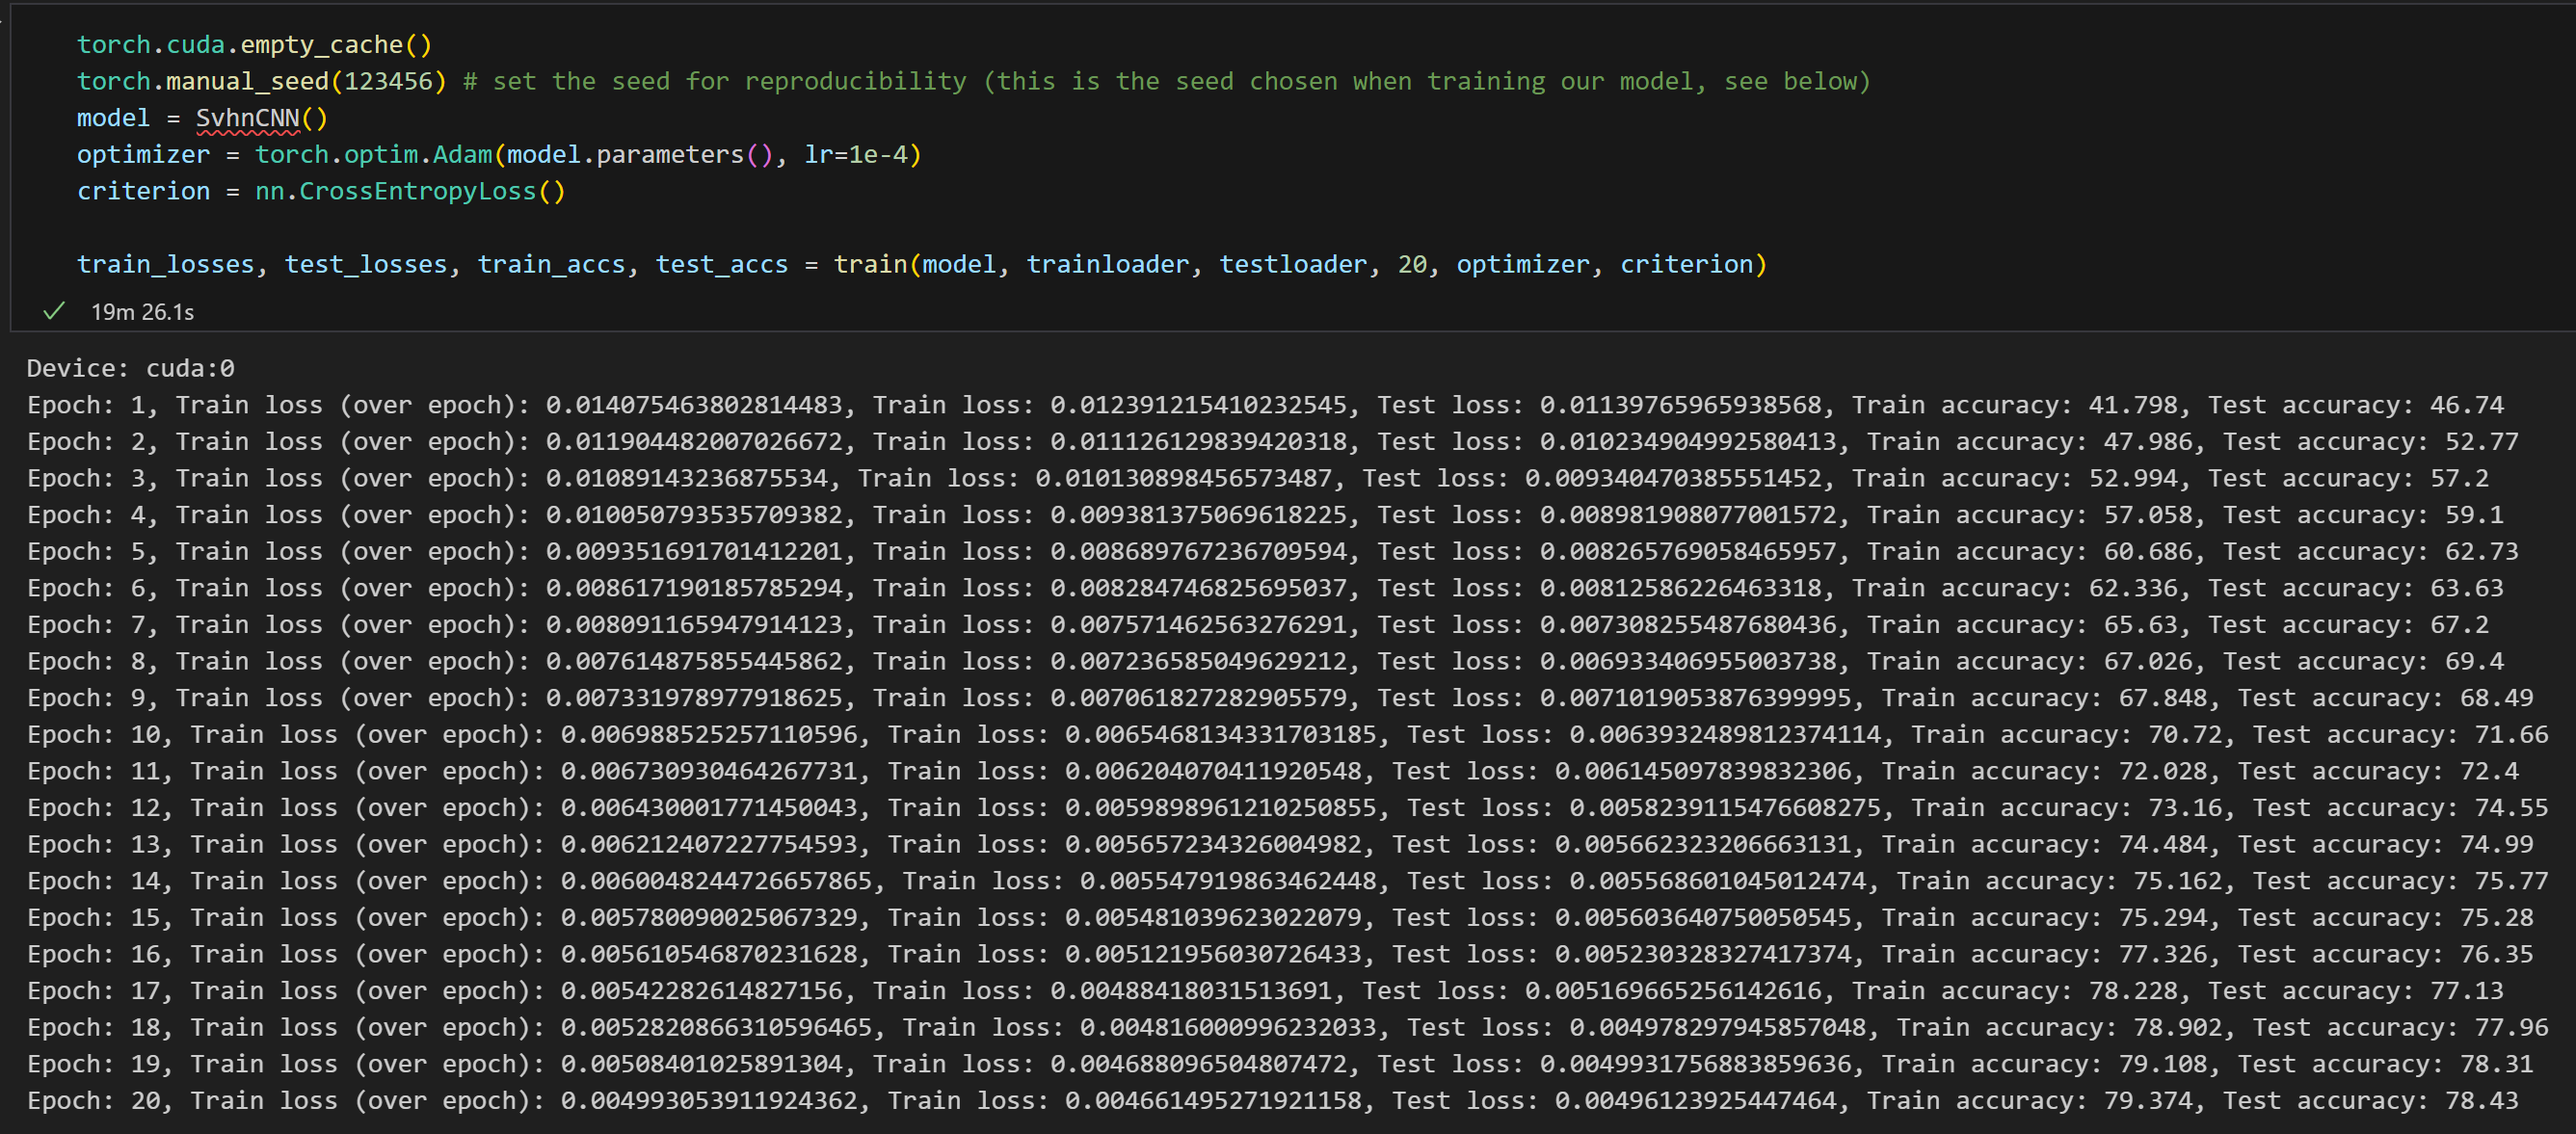

Loss and accuracy plots:

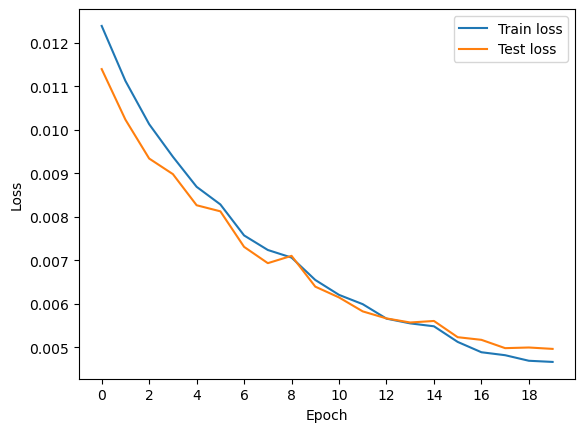

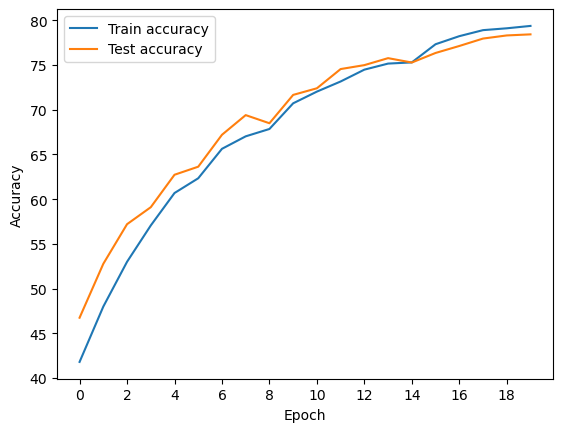

In [219]:
import matplotlib.pyplot as plt

plt.plot(train_losses, label='Train loss')
plt.plot(test_losses, label='Test loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.xticks(range(0, 20, 2))
plt.legend()
plt.show()

plt.plot(train_accs, label='Train accuracy')
plt.plot(test_accs, label='Test accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.xticks(range(0, 20, 2))
plt.legend()
plt.show()

Save the trained model:

In [220]:
# CAUTION: overwrites the model
torch.save(model.state_dict(), 'SvhnCNN_random_seed_123456.pt')

Train and test accuracies:

In [221]:
predictions, truth, accuracy, loss = predict(model, trainloader, criterion)
print(accuracy)
predictions, truth, accuracy, loss = predict(model, testloader, criterion)
print(accuracy)

79.544
78.43


Our baseline accuracy on the test set is $78.43 \%$  
Double check:

In [223]:
# load the model from the saved file
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")
model = SvhnCNN().to(device)
model.load_state_dict(torch.load('SvhnCNN_random_seed_123456.pt'))

_, _, train_acc, _ = predict(model, trainloader, criterion)
print(train_acc)
test_predictions, test_truth, test_acc, test_loss = predict(model, testloader, criterion)
print(test_acc)

79.472
78.43


In [231]:
for clas in classes:
    print(clas)

plane
car
bird
cat
deer
dog
frog
horse
ship
truck


Exception ignored in: <function _MultiProcessingDataLoaderIter.__del__ at 0x0000020F36C98360>
Traceback (most recent call last):
  File "c:\Users\totos\portableapps\anaconda3\envs\PyTorchEnv\Lib\site-packages\torch\utils\data\dataloader.py", line 1478, in __del__
    self._shutdown_workers()
  File "c:\Users\totos\portableapps\anaconda3\envs\PyTorchEnv\Lib\site-packages\torch\utils\data\dataloader.py", line 1436, in _shutdown_workers
    if self._persistent_workers or self._workers_status[worker_id]:
                                   ^^^^^^^^^^^^^^^^^^^^
AttributeError: '_MultiProcessingDataLoaderIter' object has no attribute '_workers_status'


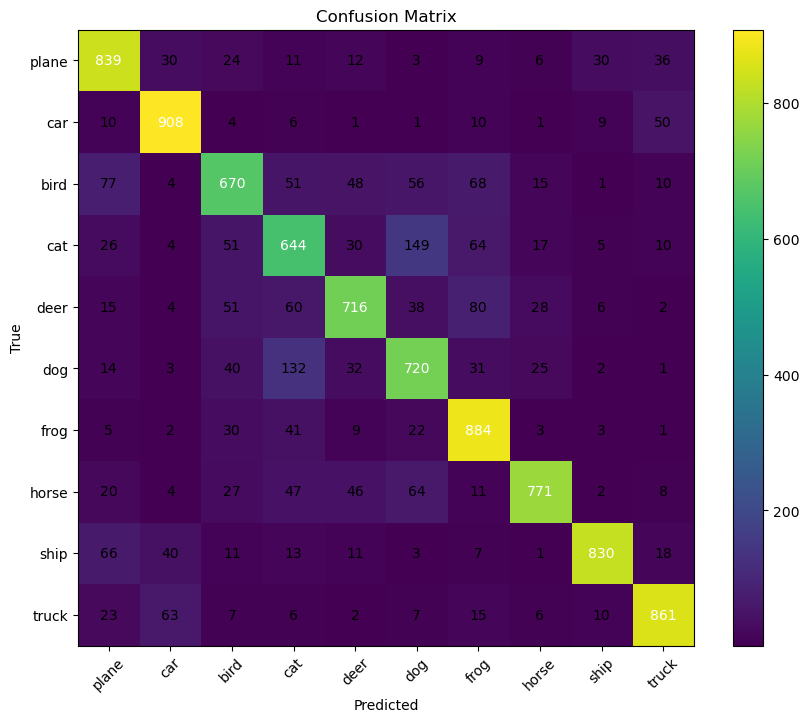

In [224]:
classes = ('plane', 'car', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck')
create_plot_confusion_matrix(test_predictions, test_truth, classes)

Most confusing classes and what they are confused with:  
1. Cat - mistaken to be dog  
$149 / 1000 = 14.9\%$ of the time
2. Dog - mistaken to be cat  
$132 / 1000 = 13.2\%$ of the time
3. Deer - mistaken to be frog  
$80 / 1000 = 8\%$ of the time

2. Design your own Convolutional Neural Network (CNN) to classify CIFAR-10. You can modify the network from section 1,but **you must get a better result than your baseline accuracy from section 1**.
    * You **need** to use one of the following in your CNN - Residual block, activation function <a href="https://pytorch.org/docs/stable/generated/torch.nn.PReLU.html">PReLU</a>, activation function Leaky ReLU, Group Normalization, <a href="https://towardsdatascience.com/intuitive-explanation-of-exponential-moving-average-2eb9693ea4dc">Exponential moving average (EMA)</a>.
      Explain the technique you have chosen.
    * Describe the chosen architecture, how many layers? What activations did you choose? What are the filter sizes? Did you use fully-connected layers (if you did, explain their sizes)?
    * What is the input dimension? What is the output dimension?
    * Calculate the number of parameters (weights) in the network.

  **Note:** 
    * The new network should perform better over the same task (i.e. using the same data with the same hyper-parameters. Change only the network architecture).
    * Students who reach the highest accuracy over the test set will receive **5 bonus points** for this exercise.


In [48]:
# NOTE: the following block is irrelevant.
# NOTE: we initially thought augmentation was allowed.
# NOTE: Leaving the code here for future reference.

# >>> obsolete

# transform_train = transforms.Compose([
#     transforms.RandomCrop(32, padding=4),
#     transforms.ColorJitter(brightness=63. / 255., saturation=[0.5, 1.5], contrast=[0.2, 1.8]),
#     transforms.ToTensor(),  # (almost) Always use this!
#     # SVHN dataset's:     Mean - R    Mean - G   Mean - B       STD - R     STD - G     STD - B
#     transforms.Normalize((0.4376821, 0.4437697, 0.47280442), (0.19803012, 0.20101562, 0.19703614)),
# ])

# # Normalize the test set same as training set without augmentation
# transform_test = transforms.Compose([
#     transforms.ToTensor(),
#     transforms.Normalize((0.4376821, 0.4437697, 0.47280442), (0.19803012, 0.20101562, 0.19703614)),
# ])

# <<< obsolete

# >>> the actual code:

# from torch.utils.data import Dataset, ConcatDataset, DataLoader

# transform_augmentation = transforms.Compose([
#     transforms.ColorJitter(brightness=63. / 255., saturation=[0.5, 1.5], contrast=[0.2, 1.8]),
#     transforms.RandomRotation(degrees=5),     # Randomly rotate the image by up to 15 degrees
#     transforms.RandomHorizontalFlip(),         # Randomly flip the image horizontally
#     transforms.RandomCrop(32, padding=4),      # Randomly crop the image to 32x32 pixels with padding
#     transforms.ToTensor(),                     # Convert the image to a PyTorch tensor
#     transforms.Normalize((0.4376821, 0.4437697, 0.47280442), (0.19803012, 0.20101562, 0.19703614))
# ])

# train_dataset_aug = torchvision.datasets.CIFAR10(root, train=True, download=False, transform=transform_augmentation)
# train_dataset = torchvision.datasets.CIFAR10(root, train=True, download=False, transform=transform_train)

# our_train_dataset = ConcatDataset([train_dataset, train_dataset_aug])
# our_trainloader = DataLoader(our_train_dataset, batch_size=128, shuffle=True, num_workers=2)

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


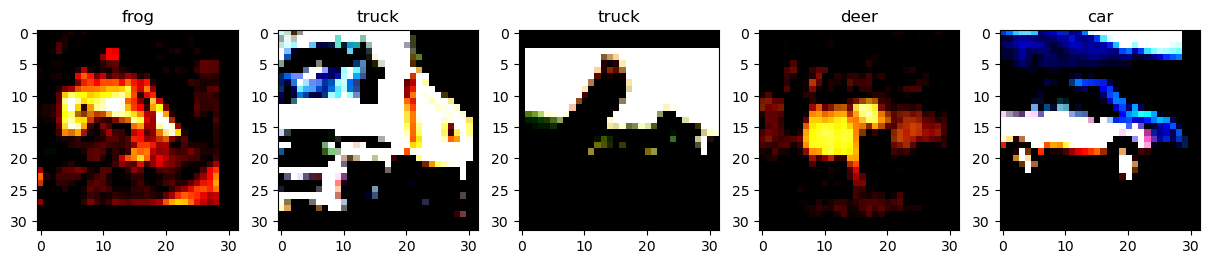

In [52]:
# NOTE: the following block is irrelevant.
# NOTE: same as above.
# NOTE: Leaving the code here for future reference.

# take a look at the augmented images

# display the first 5 images of train_dataset_aug with their labels as the titles
classes = ('plane', 'car', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck')
plt.figure(figsize=(15, 10))
for i in range(5):
    plt.subplot(1, 5, i+1)
    plt.imshow(train_dataset_aug[i][0].permute(1, 2, 0))
    plt.title(classes[train_dataset_aug[i][1]])

In [50]:
def num_params(model):
    # for param in model.parameters():
    #     print(param.requires_grad)
    # print(list(model.parameters()))
    return sum(p.numel() for p in model.parameters() if p.requires_grad)

3. Train the classifier (preferably on a **GPU - use Colab for this part** if you don't have a GPU).
    * Describe the hyper-parameters of the model (batch size, epochs, learning rate....). How did you tune your model? Did you use a validation set to tune the model? (<a href="https://gist.github.com/MattKleinsmith/5226a94bad5dd12ed0b871aed98cb123">Separating to train/validation/test in PyTorch</a>)
    * What is the final accuracy on the test set?

The original model has this many parameters:

In [178]:
model = SvhnCNN()
num_params(model)

4482058

Split trainset into train and validation sets (adapted from github code linked above)

In [56]:
# https://gist.github.com/kevinzakka/d33bf8d6c7f06a9d8c76d97a7879f5cb#file-data_loader-py
# This is an example for the MNIST dataset (formerly CIFAR-10).
# There's a function for creating a train and validation iterator.
# There's also a function for creating a test iterator.
# Inspired by https://discuss.pytorch.org/t/feedback-on-pytorch-for-kaggle-competitions/2252/4

# Adapted for MNIST by github.com/MatthewKleinsmith

import numpy as np
import torch
from torchvision import datasets, transforms
from torch.utils.data.sampler import SubsetRandomSampler


def get_train_valid_loader(trainset_pt,
                           batch_size,
                           random_seed,
                           valid_size=0.2,
                           shuffle=True,
                           show_sample=False,
                           num_workers=2):
    """
    Returns
    -------
    - train_loader: training set iterator.
    - valid_loader: validation set iterator.
    """
    error_msg = "[!] valid_size should be in the range [0, 1]."
    assert ((valid_size >= 0) and (valid_size <= 1)), error_msg

    # load trainset
    trainset = torch.load(trainset_pt)

    num_train = len(trainset)
    indices = list(range(num_train))
    split = int(np.floor(valid_size * num_train))

    if shuffle == True:
        np.random.seed(random_seed)
        np.random.shuffle(indices)

    train_idx, valid_idx = indices[split:], indices[:split]

    train_sampler = SubsetRandomSampler(train_idx)
    valid_sampler = SubsetRandomSampler(valid_idx)

    train_loader = torch.utils.data.DataLoader(trainset, 
                    batch_size=batch_size, sampler=train_sampler, 
                    num_workers=num_workers)

    valid_loader = torch.utils.data.DataLoader(trainset, 
                    batch_size=batch_size, sampler=valid_sampler, 
                    num_workers=num_workers)


    # visualize some images
    if show_sample:
        sample_loader = torch.utils.data.DataLoader(trainset, 
                                                    batch_size=9, 
                                                    shuffle=shuffle, 
                                                    num_workers=num_workers)
        data_iter = iter(sample_loader)
        images, labels = data_iter.next()
        X = images.numpy()
        plot_images(X, labels)

    return (train_loader, valid_loader)

# https://gist.github.com/kevinzakka/d33bf8d6c7f06a9d8c76d97a7879f5cb#file-utils-py

import matplotlib.pyplot as plt

def plot_images(images, labels, preds=None):

    assert len(images) == len(labels) == 9

    # Create figure with sub-plots.
    fig, axes = plt.subplots(3, 3)

    for i, ax in enumerate(axes.flat):
        ax.imshow(images[i, 0, :, :], interpolation='spline16', cmap='gray')
            
        label = str(labels[i])
        if preds is None:
            xlabel = label
        else:
            pred = str(preds[i])
            xlabel = "True: {0}\nPred: {1}".format(label, pred)
            
        ax.set_xlabel(xlabel)
        ax.set_xticks([])
        ax.set_yticks([])

    plt.show()

In [107]:
# if not loading a presaved trainset, use: trainset, trainloader, testset, testloader = load_CIFAR10()
trainset, trainloader, testset, testloader = load_CIFAR10(batch_size=128, trainset_path='trainset.pt')

# split the trainset into train and validation sets
trainloader, valloader = get_train_valid_loader('trainset.pt', 128, 42, valid_size=0.2, shuffle=True, show_sample=False, num_workers=2)

# verify the validation size
print('train set size:', len(trainloader)*128, 'validation set size:', len(valloader)*128)
print('validation proportion out of original trainset:', len(valloader) / (len(trainloader) + len(valloader))) # an approximation because there may be unfilled batches. Good enough for our purposes.

train set size: 40064 validation set size: 10112
validation proportion out of original trainset: 0.20153061224489796


In [70]:
# extract the number of examples in the batch (there may be incomplete batches, of size less than 128)
for i, data in enumerate(testloader):
    if i == 0:
        print(data)
        print(list(data[1].size())[0]) # this does the trick
        break

[tensor([[[[ 0.9187,  0.9385,  1.0573,  ...,  0.5028,  0.2850,  0.0870],
          [ 0.7999,  0.7801,  0.9385,  ...,  0.4830,  0.2652,  0.1464],
          [ 0.7801,  0.7801,  0.9187,  ...,  0.5424,  0.3642,  0.1662],
          ...,
          [-0.8636, -1.3785, -1.5963,  ..., -1.4577, -1.9527, -1.4181],
          [-1.0022, -1.2398, -1.5171,  ..., -1.6953, -1.6359, -1.8141],
          [-1.1408, -1.1012, -1.3190,  ..., -1.7349, -1.5369, -1.7943]],

         [[-0.0227, -0.0422,  0.0554,  ..., -0.3543, -0.4323, -0.5494],
          [-0.0227, -0.0617,  0.0164,  ..., -0.3543, -0.4323, -0.4909],
          [-0.0617, -0.0812, -0.0422,  ..., -0.2958, -0.3543, -0.4714],
          ...,
          [ 0.2115, -0.2568, -0.4909,  ..., -0.3153, -0.9591, -0.5494],
          [ 0.0554, -0.2177, -0.5494,  ..., -0.6079, -0.6079, -0.9591],
          [-0.1202, -0.1592, -0.4714,  ..., -0.7055, -0.5689, -0.9005]],

         [[-1.4243, -1.4642, -1.3845,  ..., -1.6831, -1.6831, -1.7428],
          [-1.3845, -1.6035, 

In [182]:
def train_with_validation(model, trainloader, valloader, epochs, optimizer, criterion, save_path = None):

    torch.cuda.empty_cache()
    
    device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
    print('Device:', device)
    model.to(device)

    best_val_acc = 0
    best_model = None

    for epoch in range(epochs):  # loop over the dataset multiple times
        total_loss = 0.0
        total_examples = 0

        for data in trainloader:
            # get the inputs; data is a list of [inputs, labels]
            inputs, labels = data[0].to(device), data[1].to(device)

            # zero the parameter gradients
            optimizer.zero_grad()

            # forward + backward + optimize
            outputs = model(inputs)
            loss = criterion(outputs, labels)
            loss.backward()
            optimizer.step()

            # print statistics
            total_loss += loss.item()
            total_examples += list(labels.size())[0]

        preds, truth, train_acc, loss = predict(model, trainloader, criterion)
        preds, truth, val_acc, loss = predict(model, valloader, criterion)
        print(f'Epoch: {epoch+1}, Train loss: {total_loss/total_examples}, Train accuracy: {train_acc}, Validation accuracy: {val_acc}')

        if val_acc > best_val_acc:
            best_val_acc = val_acc
            best_model = model.state_dict()

    # Save the best model
    if save_path:
        torch.save(best_model, save_path)
    
    return best_model, best_val_acc

In [179]:
# verify how previous model works: inference works as expected
model = SvhnCNN()
model.load_state_dict(torch.load('svhn_architecture_baseline.pt'))
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
model.to(device)
model(testset[0][0].unsqueeze(0).to(device))

tensor([[-4.2342,  0.2714, -3.7885,  4.2220, -4.7767,  1.9707, -0.8151, -4.3072,
          2.0835, -0.1588]], device='cuda:0', grad_fn=<AddmmBackward0>)

Test the new `train_with_validation` loop:  
Please note: the loss here is properly normalized by the total number of training examples (50,000).  
This is why there is a change in order of magnitude, which has no significance for model performance.  
Only the relative decrease in loss can be said to have significance.

In [183]:
torch.manual_seed(123456) # this is the seed used when training our model
model = SvhnCNN()
optimizer = torch.optim.Adam(model.parameters(), lr=1e-4)
criterion = nn.CrossEntropyLoss()

best_state_dict, best_val_acc = train_with_validation(model, trainloader, valloader, 20, optimizer, criterion)

Device: cuda
Epoch: 1, Train loss: 0.014104053463935852, Train accuracy: 43.21, Validation accuracy: 43.15
Epoch: 2, Train loss: 0.011799480290412903, Train accuracy: 48.002, Validation accuracy: 48.62
Epoch: 3, Train loss: 0.01068529580116272, Train accuracy: 53.41, Validation accuracy: 53.31
Epoch: 4, Train loss: 0.009871622796058655, Train accuracy: 58.354, Validation accuracy: 58.38
Epoch: 5, Train loss: 0.009158238149881363, Train accuracy: 59.666, Validation accuracy: 60.11
Epoch: 6, Train loss: 0.00860352266907692, Train accuracy: 63.84, Validation accuracy: 64.5
Epoch: 7, Train loss: 0.008117490062713622, Train accuracy: 65.602, Validation accuracy: 65.57
Epoch: 8, Train loss: 0.007709561805725098, Train accuracy: 67.798, Validation accuracy: 68.45
Epoch: 9, Train loss: 0.007405929790735245, Train accuracy: 68.44, Validation accuracy: 68.48
Epoch: 10, Train loss: 0.007009118707180023, Train accuracy: 71.042, Validation accuracy: 71.53
Epoch: 11, Train loss: 0.006778083763122559

In [184]:
# testing the best model (happens to be the last one in our case so we can ignore the TypeError):
preds, truth, test_acc, loss = predict(model, testloader, criterion)

In [185]:
test_acc

78.47

The result on test is $78.47\%$, higher (but not significantly - increase of about 1.7\%) than our baseline of 77.14\% on the test set.  
This is an artifact of the randomness in the optimization method, as the model was optimized the same way in the new train loop as in the old one.  
The highest train and validation accuracies were achieved on the final epoch.  
Conclusion: the model still improves when training for more epochs, and there is no need for picking out the best model from all epochs via validation.  
(Slightly rash, we need more examples to arrive at this conclusion confidently, but the goal of beating the benchmark of can be attained without the above).

In [186]:
(78.47 - 77.14)/77.14

0.017241379310344807

**Our Models**

Take 1:  
The following model did not train well when using the new `train_with_validation` function.  
To see if the problem is with the function, let us test it on the original model (above).  
Seems like its not with the function.  Interesting phenomenon.  
Model structure:  
- Added a convolution block, which changes the net and doubles the final number of channels from 128 to 256.
- Changed ReLU to LeakyReLU (but perhaps there is too much regularization now)  

The increase in network depth roughly doubles the number of parameters (9,561,866 vs `SvhnCNN`:4,482,058)  
Take 2:  
It did however improve performance when trained with the normal `train` function!  
Our trained model achieves an accuracy of $84.77 \%$.

In [114]:
class OurCNN1(nn.Module):
    """CNN for the SVHN Datset"""

    def __init__(self):
        """CNN Builder."""
        super(OurCNN1, self).__init__()

        self.conv_layer = nn.Sequential(

            # Conv Layer block 1
            nn.Conv2d(in_channels=3, out_channels=16, kernel_size=3, padding=1),
            nn.BatchNorm2d(16),
            nn.LeakyReLU(inplace=True),
            nn.Conv2d(in_channels=16, out_channels=32, kernel_size=3, padding=1),
            nn.LeakyReLU(inplace=True),

            # Conv Layer block 2
            nn.Conv2d(in_channels=32, out_channels=64, kernel_size=3, padding=1),
            # What are the dims after this layer? 
            # How many weights?
            nn.BatchNorm2d(64),
            nn.LeakyReLU(inplace=True),
            nn.Conv2d(in_channels=64, out_channels=64, kernel_size=3, padding=1),
            nn.LeakyReLU(inplace=True),
            nn.MaxPool2d(kernel_size=2, stride=2),

            # Conv Layer block 3
            nn.Conv2d(in_channels=64, out_channels=128, kernel_size=3, padding=1),
            nn.BatchNorm2d(128),
            nn.LeakyReLU(inplace=True),
            nn.Conv2d(in_channels=128, out_channels=128, kernel_size=3, padding=1),
            nn.LeakyReLU(inplace=True),
            nn.MaxPool2d(kernel_size=2, stride=2),
            nn.Dropout2d(p=0.05),  # <- Why is this here?

            # Modified Conv Layer block 4
            nn.Conv2d(in_channels=128, out_channels=256, kernel_size=3, padding=1),
            nn.LeakyReLU(inplace=True),
            nn.Conv2d(in_channels=256, out_channels=256, kernel_size=3, padding=1),
            nn.LeakyReLU(inplace=True),
        )

        self.fc_layer = nn.Sequential(
            nn.Dropout(p=0.1),
            nn.Linear(2*8192, 512),
            nn.LeakyReLU(inplace=True),
            nn.Linear(512, 10)
        )


    def forward(self, x):
        """Perform forward."""
        
        # conv layers
        x = self.conv_layer(x)
        
        # flatten
        x = x.view(x.size(0), -1)
        
        # fc layer
        x = self.fc_layer(x)

        return x

In [225]:
def count_layers(model):
    return sum(1 for _ in model.modules())

dummymodel = OurCNN1()
total_layers = count_layers(dummymodel)
print(f'Total number of layers: {total_layers}')

Total number of layers: 29


In [187]:
newmodel = OurCNN1()
num_params(newmodel), num_params(model) # our model is bigger!

(9561866, 4482058)

In [188]:
torch.cuda.empty_cache() # to free up the gpu

Attempt train with validation

Original attempt at training with validation did not work well:
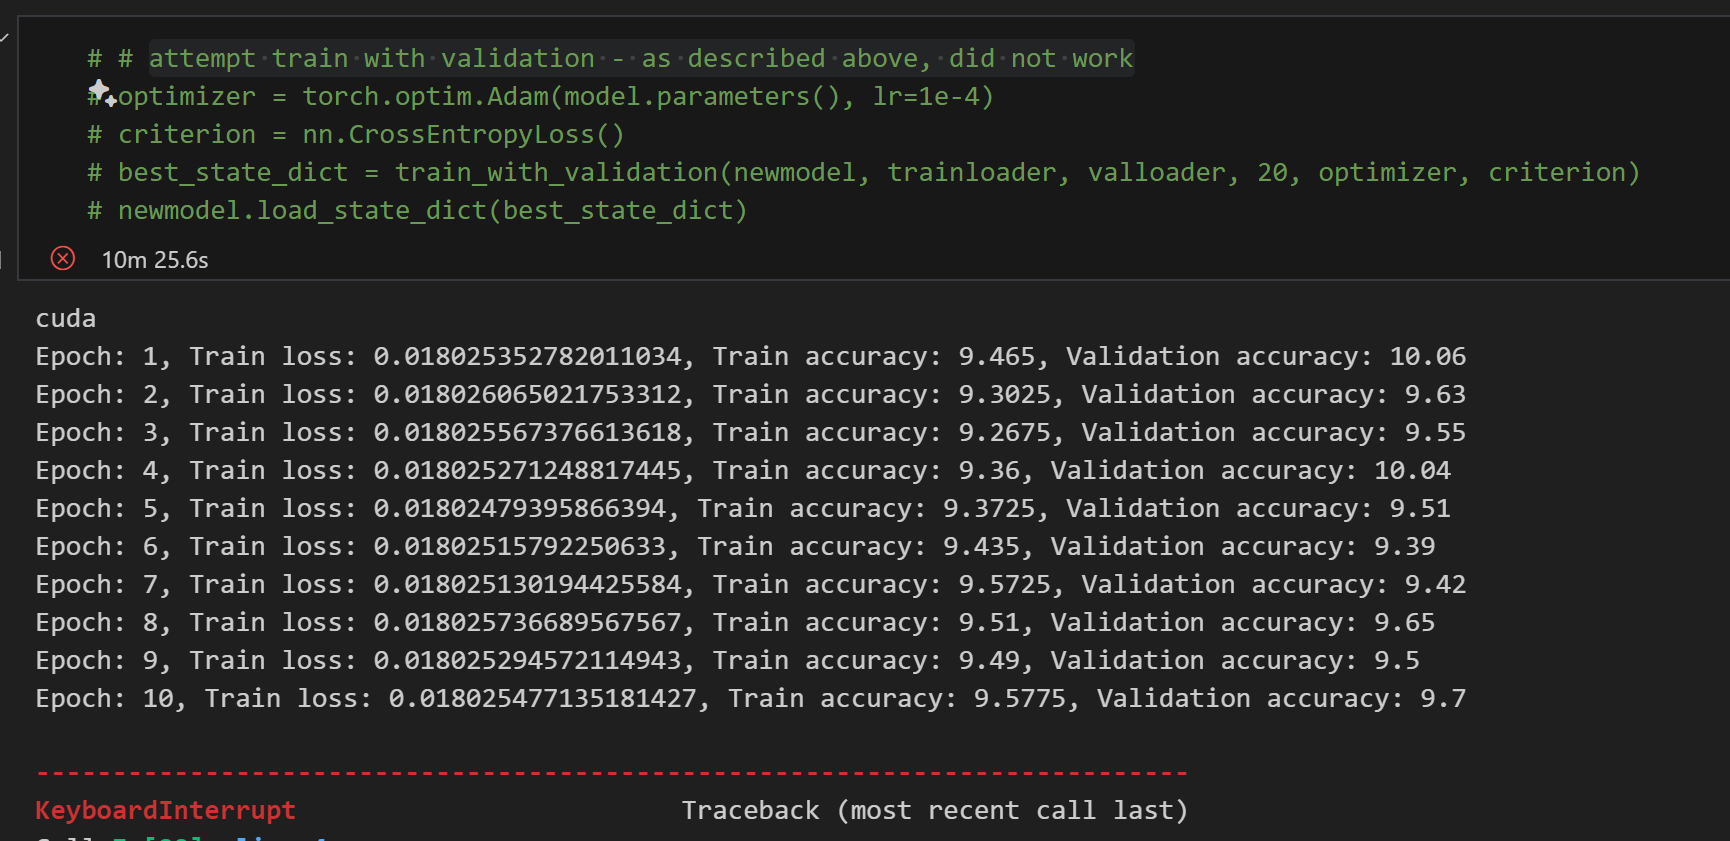

In [90]:
# # attempt train with validation - as described above, did not work
# optimizer = torch.optim.Adam(model.parameters(), lr=1e-4)
# criterion = nn.CrossEntropyLoss()
# best_state_dict = train_with_validation(newmodel, trainloader, valloader, 20, optimizer, criterion)
# newmodel.load_state_dict(best_state_dict)

cuda
Epoch: 1, Train loss: 0.018025352782011034, Train accuracy: 9.465, Validation accuracy: 10.06
Epoch: 2, Train loss: 0.018026065021753312, Train accuracy: 9.3025, Validation accuracy: 9.63
Epoch: 3, Train loss: 0.018025567376613618, Train accuracy: 9.2675, Validation accuracy: 9.55
Epoch: 4, Train loss: 0.018025271248817445, Train accuracy: 9.36, Validation accuracy: 10.04
Epoch: 5, Train loss: 0.01802479395866394, Train accuracy: 9.3725, Validation accuracy: 9.51
Epoch: 6, Train loss: 0.01802515792250633, Train accuracy: 9.435, Validation accuracy: 9.39
Epoch: 7, Train loss: 0.018025130194425584, Train accuracy: 9.5725, Validation accuracy: 9.42
Epoch: 8, Train loss: 0.018025736689567567, Train accuracy: 9.51, Validation accuracy: 9.65
Epoch: 9, Train loss: 0.018025294572114943, Train accuracy: 9.49, Validation accuracy: 9.5
Epoch: 10, Train loss: 0.018025477135181427, Train accuracy: 9.5775, Validation accuracy: 9.7


KeyboardInterrupt: 

Train `OurCNN1`:  
After running for a few times, it seems that the seed is very important for optimization to succeed.  
This is likely the issue with the above as well.  
The first run worked well and achieved a high accuracy.  Unfortunately, this seems to be fairly rare.  
The model was saved but the seed was not! :(  
In the future the seed will always be saved along with successful models.
Time to optimize for random seeds!

In [213]:
def train_with_random_seed_optimization(model_class, trainloader, testloader, epochs, optimizer, criterion, save_path = None):
    
    device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")
    print('Device:', device)

    random_seeds = [123456, 789101, 112233, 445566, 778899, 135791, 246802, 314159, 271828, 161803] # courtesy of GPT
    ind = -1
    good_accuracy_attained = False

    while not good_accuracy_attained:
        torch.cuda.empty_cache()
        
        # Increment random seed
        ind += 1
        if ind == len(random_seeds):
            print('No promising seed found. Exiting.')
            return None
        random_seed = random_seeds[ind]
        print('Random seed:', random_seed)
        torch.manual_seed(random_seed)

        # Initialize model, optimizer, criterion
        model = model_class()
        optimizer = torch.optim.Adam(model.parameters(), lr=1e-4)
        criterion = nn.CrossEntropyLoss()
        
        # Move the model to GPU if exists
        model.to(device)

        # Total number of examples to be trained on
        total_examples = sum(data[0].size()[0] for data in trainloader)

        # Losses and accuracies over the epochs
        train_losses = []
        test_losses = []
        train_accs = []
        test_accs = []

        for epoch in range(epochs):  # loop over the dataset multiple times
            total_loss = 0.0
            for data in trainloader:
                # get the inputs; data is a list of [inputs, labels]
                inputs, labels = data[0].to(device), data[1].to(device)

                # zero the parameter gradients
                optimizer.zero_grad()

                # forward + backward + optimize
                outputs = model(inputs)
                loss = criterion(outputs, labels)
                loss.backward()
                optimizer.step()

                # print statistics
                total_loss += loss.item()
                
            preds, truth, train_acc, train_loss = predict(model, trainloader, criterion)
            preds, truch, test_acc, test_loss = predict(model, testloader, criterion)

            train_losses.append(train_loss)
            test_losses.append(test_loss)
            train_accs.append(train_acc)
            test_accs.append(test_acc)
            
            print(f'Epoch: {epoch+1}, Train loss (over epoch): {total_loss/total_examples}, Train loss: {train_loss}, Test loss: {test_loss}, Train accuracy: {train_acc}, Test accuracy: {test_acc}')

            # criterion for promising seed
            if train_acc > 40:
                good_accuracy_attained = True
            else:
                break

    # Save the model
    if save_path:
        torch.save(model.state_dict(), save_path)

    return model, random_seed, train_losses, test_losses, train_accs, test_accs

In [214]:
trainset, trainloader, testset, testloader = load_CIFAR10(batch_size=128, trainset_path='trainset.pt')
model, random_seed, train_losses, test_losses, train_accs, test_accs = train_with_random_seed_optimization(OurCNN1, trainloader, testloader, 20, optimizer, criterion)

Device: cuda:0
Random seed: 123456
Epoch: 1, Train loss (over epoch): 0.013226683311462402, Train loss: 0.011284005970954894, Test loss: 0.010629777443408966, Train accuracy: 47.166, Test accuracy: 51.22
Epoch: 2, Train loss (over epoch): 0.010499546395540238, Train loss: 0.010071092171669006, Test loss: 0.009210294222831726, Train accuracy: 54.502, Test accuracy: 58.8
Epoch: 3, Train loss (over epoch): 0.008841911625862122, Train loss: 0.00788011852145195, Test loss: 0.0074227617084980015, Train accuracy: 63.81, Test accuracy: 66.65
Epoch: 4, Train loss (over epoch): 0.007721492632627487, Train loss: 0.007132147799730301, Test loss: 0.006885045909881592, Train accuracy: 67.872, Test accuracy: 69.42
Epoch: 5, Train loss (over epoch): 0.00681030002951622, Train loss: 0.006148515658378601, Test loss: 0.006070208978652954, Train accuracy: 72.27, Test accuracy: 73.18
Epoch: 6, Train loss (over epoch): 0.006205133535861969, Train loss: 0.005773079621195793, Test loss: 0.005679015272855759, 

Conclusion: increasing model size can amplify performance.  
In the future, it would be worth checking exactly how much using `LeakyReLU` changed performance.

In [215]:
# CAUTION: overwrites the model
torch.save(model.state_dict(), 'OurCNN_random_seed_123456.pt')

The model that worked:

In [227]:
model = OurCNN1()
model.load_state_dict(torch.load('OurCNN_random_seed_123456.pt'))
model.to(device)
preds, truth, acc, loss = predict(model, testloader, criterion)
acc

84.77

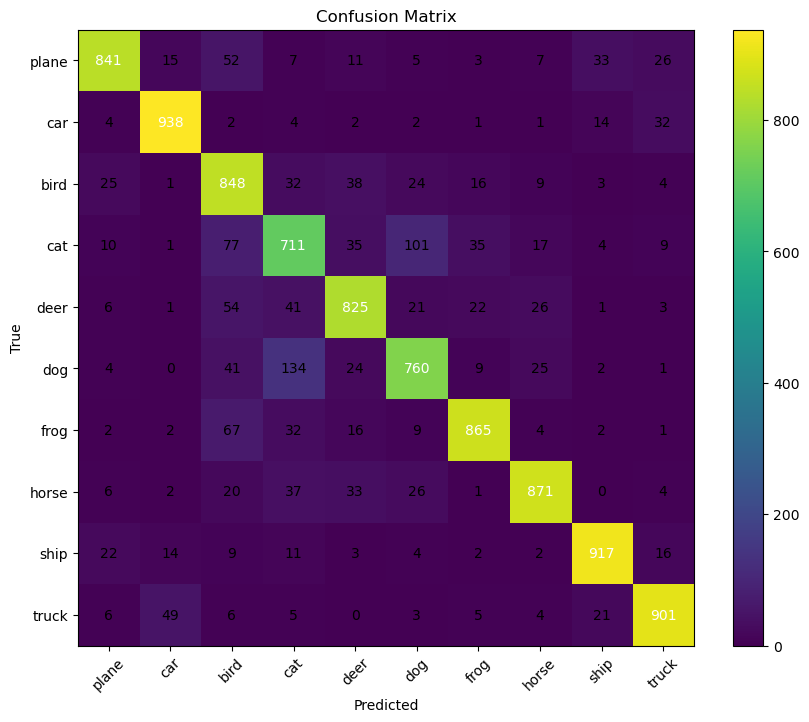

In [228]:
create_plot_confusion_matrix(preds, truth, classes)

Loss and accuracy plots vs. epoch

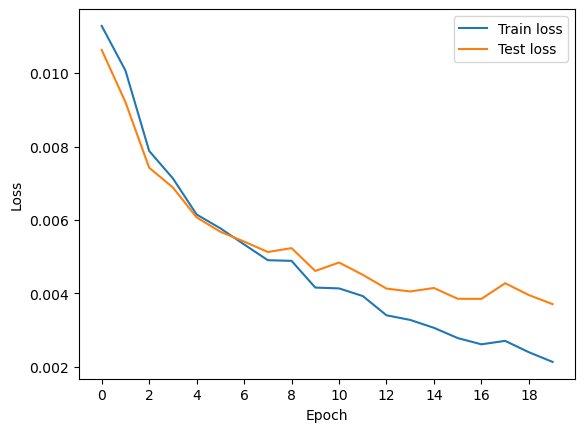

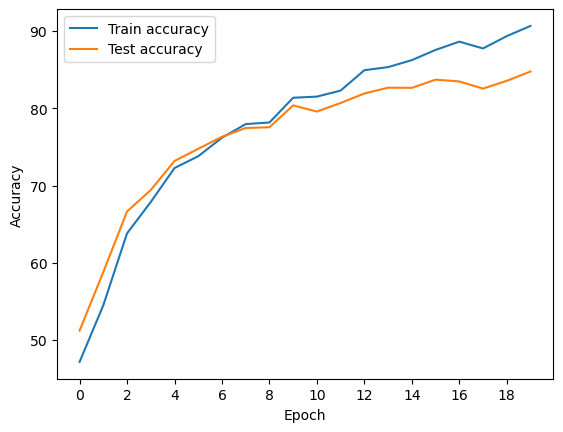

In [217]:
plt.plot(train_losses, label='Train loss')
plt.plot(test_losses, label='Test loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.xticks(range(0, 20, 2))
plt.legend()
plt.show()

plt.plot(train_accs, label='Train accuracy')
plt.plot(test_accs, label='Test accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.xticks(range(0, 20, 2))
plt.legend()
plt.show()

#### Part 3 - Foundation Models
---
As we've seen, CNNs are very powerful models for image classification, However, they also require a lot of training data and a lot of training time. In this part we will use CLIP, a new model from OpenAI, which is a foundation model for vision and language. CLIP is a neural network trained on a variety of (image, text) pairs. It can be instructed in natural language to predict the most relevant text snippet, given an image, without directly optimizing for the task, similarly it can be asked to predict the most relevant image, given some text. CLIP has been trained on 400 million (image, text) pairs ([read more here](https://openai.com/blog/clip/)).

The following exercise can be done both locally on cpu, and in GPU. consider the following: if it is done on CPU, it will take a long time to run, and that's ok.

We'll first start by installing the CLIP model and the necessary packages:

In [55]:
!pip install git+https://github.com/openai/CLIP.git
!pip install seaborn

  Cloning https://github.com/openai/CLIP.git to c:\users\totos\appdata\local\temp\pip-req-build-0aicy4y_
  Resolved https://github.com/openai/CLIP.git to commit dcba3cb2e2827b402d2701e7e1c7d9fed8a20ef1
  Preparing metadata (setup.py): started
  Preparing metadata (setup.py): finished with status 'done'
     ---------------------------------------- 0.0/42.0 kB ? eta -:--:--
     ---------------------------------------- 0.0/42.0 kB ? eta -:--:--
     --------- ------------------------------ 10.2/42.0 kB ? eta -:--:--
     ------------------ ------------------- 20.5/42.0 kB 165.2 kB/s eta 0:00:01
     -------------------------------------  41.0/42.0 kB 245.8 kB/s eta 0:00:01
     -------------------------------------- 42.0/42.0 kB 184.5 kB/s eta 0:00:00
   ---------------------------------------- 0.0/54.4 kB ? eta -:--:--
   ------- -------------------------------- 10.2/54.4 kB ? eta -:--:--
   ------------------------------------- -- 51.2/54.4 kB 650.2 kB/s eta 0:00:01
   ---------------

  Running command git clone --filter=blob:none --quiet https://github.com/openai/CLIP.git 'C:\Users\totos\AppData\Local\Temp\pip-req-build-0aicy4y_'


   ---------------------------------------- 0.0/294.9 kB ? eta -:--:--
   - -------------------------------------- 10.2/294.9 kB ? eta -:--:--
   - -------------------------------------- 10.2/294.9 kB ? eta -:--:--
   ---- ---------------------------------- 30.7/294.9 kB 330.3 kB/s eta 0:00:01
   ---------- ---------------------------- 81.9/294.9 kB 512.0 kB/s eta 0:00:01
   -------------- ----------------------- 112.6/294.9 kB 547.6 kB/s eta 0:00:01
   --------------------- ---------------- 163.8/294.9 kB 656.4 kB/s eta 0:00:01
   ------------------------------- ------ 245.8/294.9 kB 838.1 kB/s eta 0:00:01
   ------------------------------------ - 286.7/294.9 kB 886.2 kB/s eta 0:00:01
   -------------------------------------- 294.9/294.9 kB 867.9 kB/s eta 0:00:00


Now that we've installed the model, we can load it and use it to classify images. We'll start by loading the model.

In [1]:
import torch
import clip

# load the model
device = "cuda" if torch.cuda.is_available() else "cpu"
model, preprocess = clip.load("ViT-L/14@336px", device=device)


In [2]:
# find how heavy the model is
import os
model_size = os.path.getsize('baseline_cnn.pth')
print(f"Model size: {model_size / 1024 / 1024:.2f} MB")

Model size: 17.11 MB


you can find documentation for this model in the following github: https://github.com/openai/CLIP

1. Load the provided images under the directory data/clip_images. compute their embeddings, and project them to the embedding space using T-SNE(An algorithm for dimensionality reduction)(<a href="https://scikit-learn.org/stable/modules/generated/sklearn.manifold.TSNE.html">read more here</a>) . Plot the images in the embedding space. Do you see any clusters? What do you think these clusters represent?

In [234]:
torch.cuda.empty_cache()

In [2]:
import os
import numpy as np
import torch
from PIL import Image
from sklearn.manifold import TSNE
import matplotlib.pyplot as plt
from matplotlib.offsetbox import OffsetImage, AnnotationBbox

# helper functions for loading images from directories
def load_image(image_path):
    """ Load an image from a file path. """
    image = Image.open(image_path).convert("RGB")
    return image

def load_all_images_in_folder(folder_path, return_names=False):
    """ Load all images in a folder. """
    images = []
    image_names = []
    for image_path in os.listdir(folder_path):
        if 'jpg' in image_path:
            image_names.append(image_path)
            # print(image_path)
            file = os.path.join(folder_path, image_path)
            # print(file)
            image = load_image(file)
            images.append(image)
    if return_names:
        return images, image_names
    return images

In [5]:
os.listdir('data/clip_images/test') # test the os.listdir function

['05ec45dcw1.jpg',
 '08ffnto4a6.jpg',
 '0e6iicrmaw.jpg',
 '0ey20k6pio.jpg',
 '0gdx3u2l9c.jpg',
 '0jfi538xy9.jpg',
 '0vuqlx68x3.jpg',
 '0x1v3gb7zq.jpg',
 '15a944zxkj.jpg',
 '1cyvwha01l.jpg',
 '1dbl0v8ouw.jpg',
 '1n4xl7xjca.jpg',
 '1rr99tlqyz.jpg',
 '1si4edqzvn.jpg',
 '23i01r672o.jpg',
 '27k4lg8ihe.jpg',
 '2cdqqtcek5.jpg',
 '2faefw7808.jpg',
 '2g4d8y16if.jpg',
 '2im2jpmebp.jpg',
 '2m2c3aodt2.jpg',
 '2xfds2thu3.jpg',
 '321p1z6190.jpg',
 '326e5njjy8.jpg',
 '3d52zkdjoc.jpg',
 '3duti73bdw.jpg',
 '3mtvxuizef.jpg',
 '3owhvaktil.jpg',
 '3qjosadju0.jpg',
 '3x3ew0ncoc.jpg',
 '3y3lbi0g4o.jpg',
 '3y9pp3mq6c.jpg',
 '4ansbl03rb.jpg',
 '4deffsyp9a.jpg',
 '4jit0767rq.jpg',
 '4r8c1x3hrp.jpg',
 '4t0s8c7qyi.jpg',
 '52l3kz8h8w.jpg',
 '5ax4gh13au.jpg',
 '5kjzah999b.jpg',
 '5tuxphched.jpg',
 '5wv9dutyic.jpg',
 '6m4hdqvsf2.jpg',
 '7fe6y1e3qg.jpg',
 '7hr8q4pfk6.jpg',
 '7mvb319cdm.jpg',
 '7pbpmytdjj.jpg',
 '7u1l8rtwyl.jpg',
 '7wyidw185y.jpg',
 '85k9gqjlyl.jpg',
 '89edpnmcog.jpg',
 '8fqrt6vg9h.jpg',
 '8g3niqzytv

In [29]:
dogs = load_all_images_in_folder("data/clip_images/dogs")
cats = load_all_images_in_folder("data/clip_images/cats")
test = load_all_images_in_folder("data/clip_images/test") # NOTE: included these as it was not stated otherwise above

images = dogs + cats # + test - no need in this part, save encoding time by not including test images

# Preprocess the images
preprocessed_images = torch.stack([preprocess(image) for image in images]).to(device)

# Compute embeddings
with torch.no_grad():
    image_features = model.encode_image(preprocessed_images)

In [30]:
# Convert to numpy array
image_features = image_features.cpu().numpy()
images, image_features.shape

([<PIL.Image.Image image mode=RGB size=500x375>,
  <PIL.Image.Image image mode=RGB size=327x500>,
  <PIL.Image.Image image mode=RGB size=269x293>,
  <PIL.Image.Image image mode=RGB size=135x102>,
  <PIL.Image.Image image mode=RGB size=98x162>,
  <PIL.Image.Image image mode=RGB size=363x428>,
  <PIL.Image.Image image mode=RGB size=500x387>,
  <PIL.Image.Image image mode=RGB size=500x375>,
  <PIL.Image.Image image mode=RGB size=500x381>,
  <PIL.Image.Image image mode=RGB size=272x336>,
  <PIL.Image.Image image mode=RGB size=216x348>,
  <PIL.Image.Image image mode=RGB size=300x225>,
  <PIL.Image.Image image mode=RGB size=188x199>,
  <PIL.Image.Image image mode=RGB size=500x333>,
  <PIL.Image.Image image mode=RGB size=415x500>,
  <PIL.Image.Image image mode=RGB size=500x371>,
  <PIL.Image.Image image mode=RGB size=500x403>,
  <PIL.Image.Image image mode=RGB size=275x500>,
  <PIL.Image.Image image mode=RGB size=500x375>,
  <PIL.Image.Image image mode=RGB size=300x225>,
  <PIL.Image.Image im

In [31]:
# Perform TSNE
tsne = TSNE(n_components=2, random_state=42)
image_features_2d = tsne.fit_transform(image_features)
image_features_2d.shape

(100, 2)

In [31]:
# Plot the images in the 2D embedding space
def plot_images(images, embeddings, ax=None):
    if ax is None:
        fig, ax = plt.subplots(figsize=(12, 12))  # Adjust the figsize to change the size of the plot
    else:
        fig = ax.figure
    
    for image, (x, y) in zip(images, embeddings):
        image = image.resize((72, 72))  # Resize the image. Adjust as needed.
        im = OffsetImage(image, zoom=0.5)  # Create an image box
        ab = AnnotationBbox(im, (x, y), xycoords='data', frameon=False)  # Place it at (x, y)
        ax.add_artist(ab)  # Add it to the plot
    
    ax.set_xlim(min(embeddings[:,0])-1, max(embeddings[:,0])+1)
    ax.set_ylim(min(embeddings[:,1])-1, max(embeddings[:,1])+1)
    ax.set_xlabel("Dimension 1")
    ax.set_ylabel("Dimension 2")
    plt.draw()  # Redraw the plot to ensure it updates
    return fig

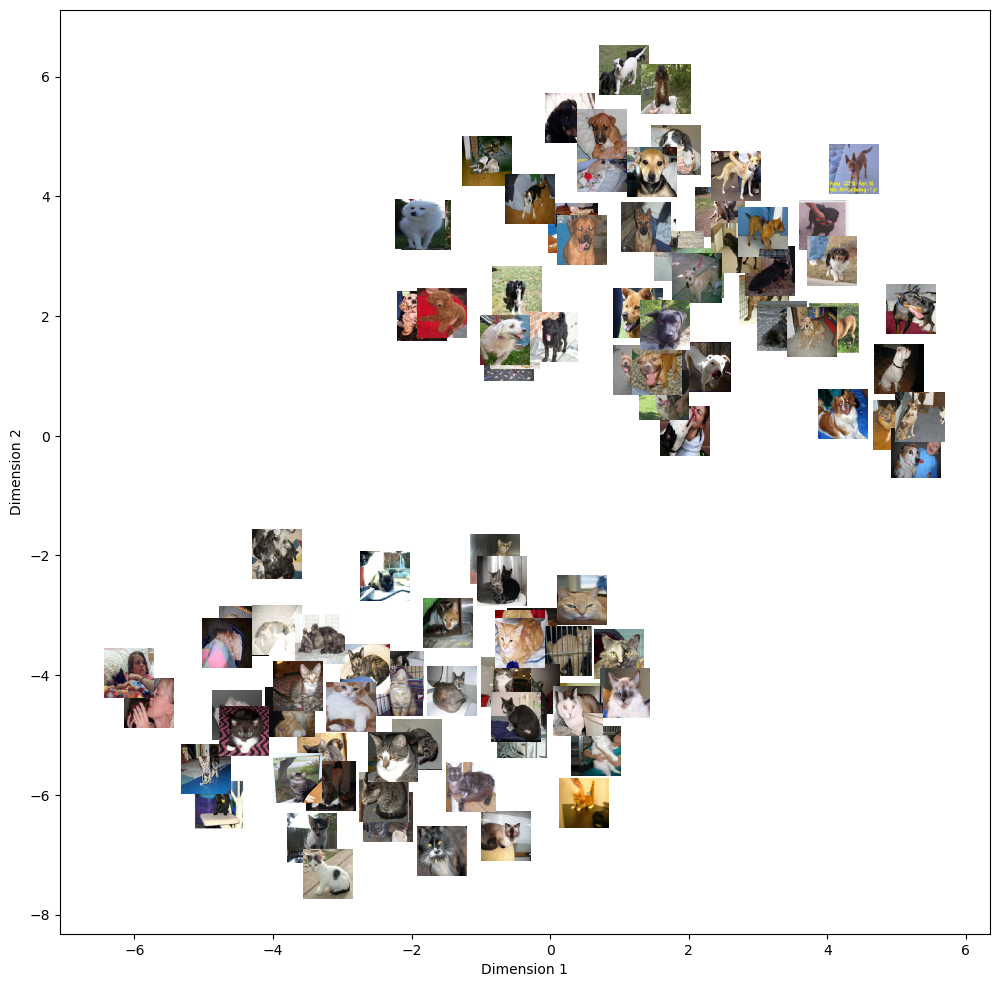

In [32]:
# `images` is a list of PIL.Image objects and `image_features_2d` is a numpy array of shape (N, 2)
fig = plot_images(images, image_features_2d)
plt.show()  # Show the plot

It seems like the CLIP embeddings (dimension-reduced using TSNE) adequately cluster the images into two groups: cats and dogs.

Let's do the same for the test images:

In [26]:
test = load_all_images_in_folder("data/clip_images/test")

# Preprocess the images
preprocessed_images = torch.stack([preprocess(image) for image in test]).to(device)

# Compute embeddings
with torch.no_grad():
    image_features = model.encode_image(preprocessed_images)

In [ ]:
# Convert to numpy array
image_features = image_features.cpu().numpy()

In [29]:
len(test), image_features.shape

(200, (200, 768))

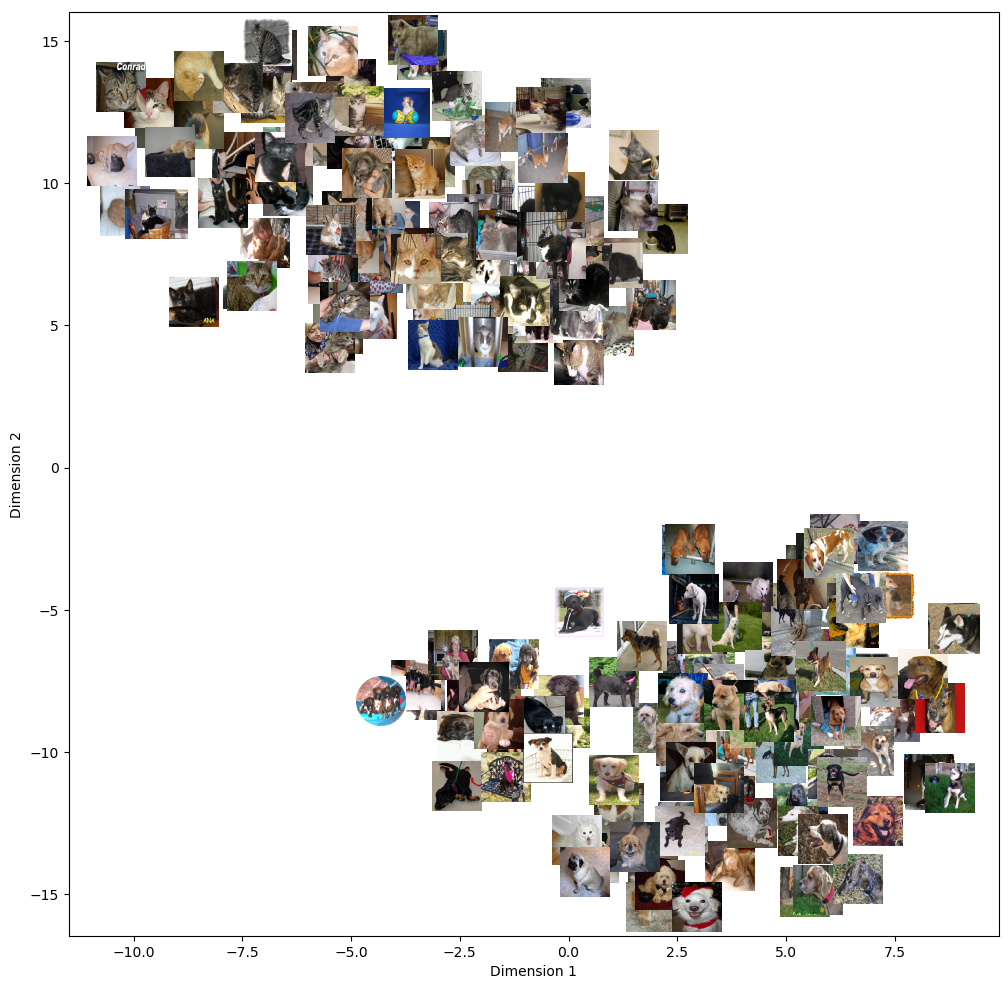

In [33]:
# Perform TSNE
tsne = TSNE(n_components=2, random_state=42)
image_features_2d = tsne.fit_transform(image_features)
image_features_2d.shape

plot_images(test, image_features_2d);

2. Load the provided image under the directory data/clip_images, named alfie.jpeg, and display it. Compute its embeddings using the CLIP model. find the top 5 most similar images (according to the cosine similarity between their embeddings). Display the result in as a row of images. Do you think the results make sense? Why?

In [6]:
# verify what device the model is currently on
device = next(model.parameters()).device
print(device)

cuda:0


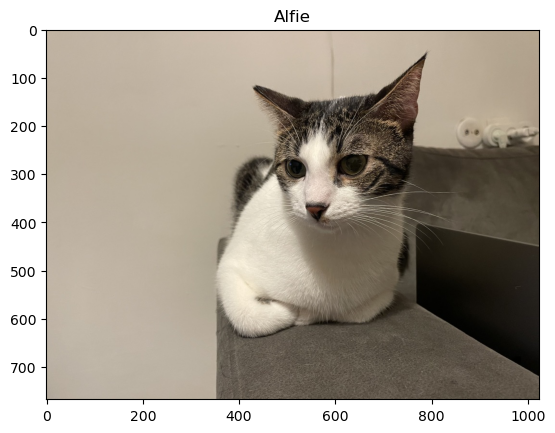

In [60]:
alfie = load_image("data/clip_images/alfie.jpeg")
embedding = model.encode_image(preprocess(alfie).unsqueeze(0).to(device)).detach().cpu().numpy()

# display alfie
plt.title("Alfie")
plt.imshow(alfie);

In [35]:
embedding.shape, image_features.shape

((1, 768), (100, 768))

(1, 100)


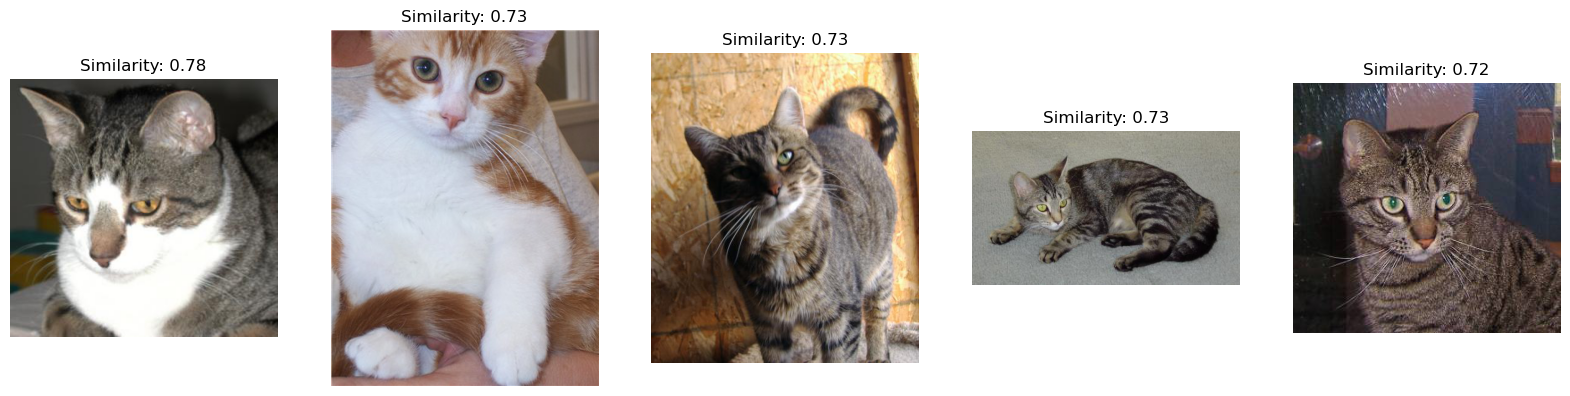

array([0.77708105, 0.73147008, 0.72758723, 0.72717189, 0.71523894])

In [36]:
# calculate the cosine similarities between the embedding obtained above and all the embeddings `image_features`
from sklearn.metrics.pairwise import cosine_similarity

cosine_similarities = cosine_similarity(embedding, image_features)
print(cosine_similarities.shape)
cosine_similarities = cosine_similarities.flatten()

# sort the similarities in descending order
sorted_indices = np.argsort(cosine_similarities)[::-1]

# display the top 5 most similar images
fig, ax = plt.subplots(1, 5, figsize=(20, 20))
for i, idx in enumerate(sorted_indices[:5]):
    image = images[idx]
    ax[i].imshow(image)
    ax[i].axis("off")
    ax[i].set_title(f"Similarity: {cosine_similarities[idx]:.2f}")
plt.show()
cosine_similarities[sorted_indices[:5]]

The results make sense (and are amazing!).  
A (slightly rash) generalization:  
CLIP embeddings capture properties of the images such that images that seem similar to us get similar embeddings.

Now that we've seen the power of CLIP Embeddings, lets try and use the textual embeddings to classify images.

3. in the data provided with the exercise, look at the directory data/clip_images/test. 

    3.1 Parse the labels in the path data/clip_images/test/labels.txt
    
    3.2 Read the images in data/clip_images/test
    
    3.3 classify each image to one of the classes, Dogs and Cats
    
    3.4 Compute the accuracy of the classification, given the labels in labels.txt, and plot a confusion matrix.

in this exercise, you must use the CLIP Textual embeddings, as shown in the tutorial.  What are the strengths of this approach? What are the weaknesses? If the folder also contained images that are not cats, nor dogs,  how would you classify those images? note - the wanted class in this case would be "Other".

In [14]:
import pandas as pd
from IPython.display import display

# 3.1
print("Parsing the labels")
labels_path = 'data/clip_images/test/labels.txt'
# read the labels as a csv file
labels = pd.read_csv(labels_path, header=None, delimiter=': ', index_col=0, names=['image', 'label'])

# display the pandas dataframe using the display function
display(labels)
print(labels.loc['7mvb319cdm.jpg']['label'])

# 3.2
print("Loading the test images")
test_images, test_image_names = load_all_images_in_folder("data/clip_images/test", return_names=True)

# 3.3
print("Processing and embedding images")
# Preprocess the images
preprocessed_images = torch.stack([preprocess(image) for image in test_images]).to(device)

# Compute embeddings
with torch.no_grad():
    image_features = model.encode_image(preprocessed_images)

# Move to cpu - this takes the bulk of the 2 and a half minutes!
image_features = image_features.cpu()
print('image_features shape', image_features.shape)

Parsing the labels


C:\Users\totos\AppData\Local\Temp\ipykernel_1212\1898364221.py:8: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support regex separators (separators > 1 char and different from '\s+' are interpreted as regex); you can avoid this warning by specifying engine='python'.
  labels = pd.read_csv(labels_path, header=None, delimiter=': ', index_col=0, names=['image', 'label'])


label
image               
7mvb319cdm.jpg   cat
gcm2l6otjp.jpg   dog
1si4edqzvn.jpg   dog
orwtfa66gl.jpg   dog
keufjohpaj.jpg   dog
...              ...
8x5n34noyh.jpg   dog
oyrpvb7ywl.jpg   cat
ifunifrs7j.jpg   dog
lbl9ap56du.jpg   dog
08ffnto4a6.jpg   cat

[200 rows x 1 columns]

cat
Loading the test images
Processing and embedding images
image_features shape torch.Size([200, 768])


In [15]:
# observe test_image_names
test_image_names

['05ec45dcw1.jpg',
 '08ffnto4a6.jpg',
 '0e6iicrmaw.jpg',
 '0ey20k6pio.jpg',
 '0gdx3u2l9c.jpg',
 '0jfi538xy9.jpg',
 '0vuqlx68x3.jpg',
 '0x1v3gb7zq.jpg',
 '15a944zxkj.jpg',
 '1cyvwha01l.jpg',
 '1dbl0v8ouw.jpg',
 '1n4xl7xjca.jpg',
 '1rr99tlqyz.jpg',
 '1si4edqzvn.jpg',
 '23i01r672o.jpg',
 '27k4lg8ihe.jpg',
 '2cdqqtcek5.jpg',
 '2faefw7808.jpg',
 '2g4d8y16if.jpg',
 '2im2jpmebp.jpg',
 '2m2c3aodt2.jpg',
 '2xfds2thu3.jpg',
 '321p1z6190.jpg',
 '326e5njjy8.jpg',
 '3d52zkdjoc.jpg',
 '3duti73bdw.jpg',
 '3mtvxuizef.jpg',
 '3owhvaktil.jpg',
 '3qjosadju0.jpg',
 '3x3ew0ncoc.jpg',
 '3y3lbi0g4o.jpg',
 '3y9pp3mq6c.jpg',
 '4ansbl03rb.jpg',
 '4deffsyp9a.jpg',
 '4jit0767rq.jpg',
 '4r8c1x3hrp.jpg',
 '4t0s8c7qyi.jpg',
 '52l3kz8h8w.jpg',
 '5ax4gh13au.jpg',
 '5kjzah999b.jpg',
 '5tuxphched.jpg',
 '5wv9dutyic.jpg',
 '6m4hdqvsf2.jpg',
 '7fe6y1e3qg.jpg',
 '7hr8q4pfk6.jpg',
 '7mvb319cdm.jpg',
 '7pbpmytdjj.jpg',
 '7u1l8rtwyl.jpg',
 '7wyidw185y.jpg',
 '85k9gqjlyl.jpg',
 '89edpnmcog.jpg',
 '8fqrt6vg9h.jpg',
 '8g3niqzytv

In [16]:
# new variable name so as to not overwrite things accidentally
raw_image_features = image_features
print(raw_image_features.shape)
print(type(raw_image_features))

torch.Size([200, 768])
<class 'torch.Tensor'>


In [17]:
# test pytorch's .norm which calculates the euclidean norm of a vector
x = raw_image_features / raw_image_features.norm(dim=-1, keepdim=True)
x[0].norm(dim=-1, keepdim=True)

tensor([1.], dtype=torch.float16)

In [18]:
# 3.4 
# classify the images
print('Classifying the test images using CLIP')
class_names = ['dog', 'cat'] # 0 is dog, 1 is cat
with torch.no_grad():
    text_features = model.encode_text(clip.tokenize(class_names).to(device)).detach().cpu()
    print('`type` of embedding:', type(text_features))

    processed_image_features = raw_image_features / raw_image_features.norm(dim=-1, keepdim=True)
    text_features /= text_features.norm(dim=-1, keepdim=True)
    
    # similarity = (100.0 * processed_image_features.float() @ text_features.float().T).softmax(dim=-1)
    # # needlessly complicated since softmax preserves order

    similarity = processed_image_features.float() @ text_features.float().T
    print('Similarity shape:', similarity.shape)
    values, predictions = torch.max(similarity, 1)
    # values, predictions = torch.max(similarity, -1) # also works
    print('Predictions shape:', predictions.shape)
    print('Predictions tensor:', predictions)

# prediction_bools = list(similarity.argmax(axis=1)) # also works

# verify normalization of vectors (for correct cosine similarity computation)
print('\n Normalized test image embeddings: \n (inaccuracies likely due to truncations)\n', np.linalg.norm(processed_image_features, axis=1, keepdims=True))

Classifying the test images using CLIP
`type` of embedding: <class 'torch.Tensor'>
Similarity shape: torch.Size([200, 2])
Predictions shape: torch.Size([200])
Predictions tensor: tensor([0, 1, 1, 0, 1, 0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0,
        1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 1, 1, 1, 1,
        1, 0, 1, 1, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 0, 0,
        1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 1, 1, 0,
        0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 0, 1, 1, 0,
        0, 0, 1, 1, 1, 0, 1, 0, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 0, 1, 1, 1, 1, 1,
        1, 0, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0,
        0, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0,
        1, 1, 0, 0, 1, 1, 0, 1])

 Normalized test image embeddings: 
 (inaccuracies likely due to truncations)
 [[1.    ]
 [0.9995]
 [0.9995]
 [0.9995]
 [1.    ]
 [1.    ]
 [0.9995

In [16]:
# access the correct label - proof of concept
display(labels)
print(type(labels))
sample = '7mvb319cdm.jpg'
sample_class = labels.loc[sample][1]
print(sample_class)
print(type(sample_class))
print(test_image_names.index(sample))
print(test_image_names[45] == sample)

1
0                  
7mvb319cdm.jpg  cat
gcm2l6otjp.jpg  dog
1si4edqzvn.jpg  dog
orwtfa66gl.jpg  dog
keufjohpaj.jpg  dog
...             ...
8x5n34noyh.jpg  dog
oyrpvb7ywl.jpg  cat
ifunifrs7j.jpg  dog
lbl9ap56du.jpg  dog
08ffnto4a6.jpg  cat

[200 rows x 1 columns]

<class 'pandas.core.frame.DataFrame'>
cat
<class 'str'>
45
True


05ec45dcw1.jpg
08ffnto4a6.jpg
0e6iicrmaw.jpg
0ey20k6pio.jpg
0gdx3u2l9c.jpg
0jfi538xy9.jpg
0vuqlx68x3.jpg
0x1v3gb7zq.jpg
15a944zxkj.jpg
1cyvwha01l.jpg


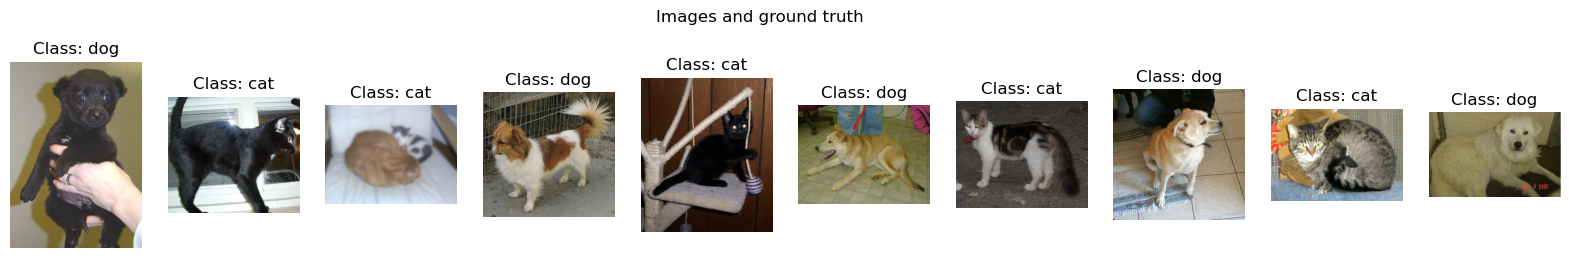

In [27]:
# display the first 10 images in test along with their correct labels
fig, ax = plt.subplots(1, 10, figsize=(20, 3))
for i in range(10):
    image = test_images[i]
    image_id = test_image_names[i]
    print(image_id)
    ax[i].imshow(image)
    ax[i].axis("off")
    ax[i].set_title(f"Class: {labels.loc[image_id][1]}")
fig.suptitle('Images and ground truth');

In [20]:
class_names = ['dog', 'cat']
predicted_labels = [class_names[pred.item()] for pred in predictions] # ordered as they appear in directory
print(predicted_labels)

# migrate the ground truth ordering to the order in which the images appear in the directory
expected_labels = [labels.loc[test_image_names[i]]['label'] for i in range(len(predicted_labels))] 
print(expected_labels)

# 3.4
# calculate the accuracy
print("Calculating the accuracy")

accuracy = sum(1 if predicted_labels[i] == expected_labels[i] else 0 for i in range(len(predicted_labels)))
accuracy = accuracy / len(predicted_labels)

print(f"Accuracy: {accuracy:.10f}")

['dog', 'cat', 'cat', 'dog', 'cat', 'dog', 'cat', 'dog', 'cat', 'dog', 'cat', 'cat', 'cat', 'dog', 'cat', 'cat', 'cat', 'cat', 'cat', 'cat', 'cat', 'dog', 'dog', 'dog', 'cat', 'dog', 'dog', 'dog', 'cat', 'dog', 'cat', 'cat', 'dog', 'dog', 'dog', 'cat', 'dog', 'dog', 'cat', 'dog', 'cat', 'dog', 'cat', 'dog', 'cat', 'cat', 'cat', 'cat', 'cat', 'dog', 'cat', 'cat', 'dog', 'cat', 'cat', 'cat', 'dog', 'dog', 'cat', 'dog', 'dog', 'dog', 'dog', 'dog', 'cat', 'dog', 'cat', 'cat', 'cat', 'cat', 'dog', 'dog', 'cat', 'dog', 'cat', 'cat', 'dog', 'dog', 'dog', 'cat', 'dog', 'dog', 'cat', 'dog', 'dog', 'dog', 'cat', 'dog', 'cat', 'dog', 'cat', 'cat', 'dog', 'cat', 'cat', 'dog', 'dog', 'dog', 'dog', 'cat', 'dog', 'cat', 'cat', 'dog', 'dog', 'dog', 'cat', 'cat', 'cat', 'dog', 'dog', 'dog', 'cat', 'dog', 'dog', 'cat', 'dog', 'cat', 'cat', 'dog', 'dog', 'dog', 'cat', 'cat', 'cat', 'dog', 'cat', 'dog', 'cat', 'cat', 'cat', 'dog', 'dog', 'dog', 'cat', 'dog', 'dog', 'cat', 'dog', 'cat', 'cat', 'cat', 'cat'

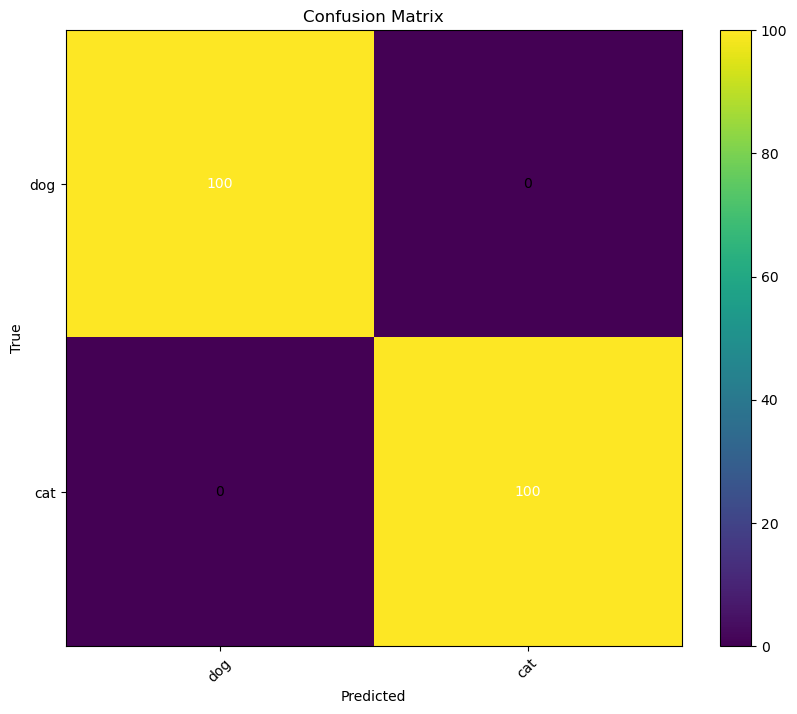

In [25]:
# confusion matrix

create_plot_confusion_matrix(predicted_labels, expected_labels, class_names)

4. Given the image under the path B, write a function that given an image of cats, returns the number of how many cats are in the image

The riddle here can be phrased: what prompt form is the best for describing to CLIP an image with N cats?

images for test in `cats` folder:
* image 37 (2 cats)
* image 8 (2 cats)
* image 19 (a ton of cats)
* image 27 (2 cats)
* images 1-5 (1 cat)

In [183]:
# clip.tokenize(['hi', 'how', 'are you doing today?'])

# this would be interesting to understand to better depth in the future 
# for example - figure out the average token length (or a histogram of token lengths)
# to do this, we could feed in a bunch of documents

Our final scheme for the function that counts the number of cats in an input image uses the best prompt method we found:  
['a photo of one kitten' if i == 1 else f'a photo of {number_to_text[i]} kittens' for i in range(upper_limit + 1)]  
The cosine similarity of the image embedding (by CLIP) with each class: 'a photo of no kittens', 'a photo of one kitten', 'a photo of two kittens' etc.,  
is calculated, and the predicted class is the one with the highest score.

In [126]:
def number_of_cats(B: str, model, preprocess, upper_limit: int):
    """B is the path of the image in which to count cats
    model is the preloaded CLIP model
    preprocess is the preprocessing the CLIP model needs to be applied to images before inference
    upper_limit is the maximum number of cats to check for (we assume there will be less than 20 cats in the image)
    """
    number_to_text = {
    0: 'no',
    1: 'one',
    2: 'two',
    3: 'three',
    4: 'four',
    5: 'five',
    6: 'six',
    7: 'seven',
    8: 'eight',
    9: 'nine',
    10: 'ten',
    11: 'eleven',
    12: 'twelve',
    13: 'thirteen',
    14: 'fourteen',
    15: 'fifteen',
    16: 'sixteen',
    17: 'seventeen',
    18: 'eighteen',
    19: 'nineteen',
    20: 'twenty'
    }

    device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

    if upper_limit >= 21:
        upper_limit = 20

    # get image embedding
    image = load_image(B)
    with torch.no_grad():
        image_embedding = model.encode_image(preprocess(image).unsqueeze(0).to(device)).cpu()

    # get text embeddings
    strings = ['a photo of one kitten' if i == 1 else f'a photo of {number_to_text[i]} kittens' for i in range(upper_limit + 1)]
    with torch.no_grad():
        text_embedding = clip.tokenize(strings).to(device)
        text_embedding = model.encode_text(text_embedding).cpu()

    # calculate similarities
    image_embedding /= image_embedding.norm(dim=-1, keepdim=True)
    text_embedding /= text_embedding.norm(dim=-1, keepdim=True)
    similarity = image_embedding.float() @ text_embedding.float().T

    print(similarity)
    # print(similarity.shape)

    # find argmax of similarity
    value, prediction = torch.max(similarity, 1)

    return prediction.item()

In [127]:
# test torch's argmax
a = torch.Tensor([1,2,3,45])
torch.argmax(a).item()

3

Below is our attempt at optimizing the prompt format:

In [44]:
def tokenize_and_embed(model, strings, device):
    with torch.no_grad():
        embedding = clip.tokenize(strings).to(device)
        embedding = model.encode_text(embedding).cpu()
    return embedding

def similarity_and_argmax(image_embedding, text_embedding):
    # calculate similarities
    # should be plural, i.e. image_embeddings and text_embeddings
    image_embedding /= image_embedding.norm(dim=-1, keepdim=True)
    text_embedding /= text_embedding.norm(dim=-1, keepdim=True)
    similarity = image_embedding.float() @ text_embedding.float().T
    value, prediction = torch.max(similarity, 1)
    return prediction.item()

def test_string_methods(model, preprocess, upper_limit=10):
    torch.cuda.empty_cache()
    device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
    number_to_text = {
    0: 'no',
    1: 'one',
    2: 'two',
    3: 'three',
    4: 'four',
    5: 'five',
    6: 'six',
    7: 'seven',
    8: 'eight',
    9: 'nine',
    10: 'ten',
    11: 'eleven',
    12: 'twelve',
    13: 'thirteen',
    14: 'fourteen',
    15: 'fifteen',
    16: 'sixteen',
    17: 'seventeen',
    18: 'eighteen',
    19: 'nineteen',
    20: 'twenty'
    }
    if upper_limit >= 21:
        upper_limit = 20

    string_types = {"number_word+'cats'": ['one cat' if i == 1 else f'{number_to_text[i]} cats' for i in range(upper_limit + 1)],
                    'written_number': [f'{number_to_text[i]}' for i in range(upper_limit + 1)],
                    'number': [f'{i}' for i in range(upper_limit + 1)],
                    'a photo of number_word cats': [f'a photo of one cat' if i==1 else 'a photo of {number_to_text[i]} cats' for i in range(upper_limit + 1)],
                    'a photo with number_word cats': [f'a photo with one cat' if i==1 else 'a photo with {number_to_text[i]} cats' for i in range(upper_limit + 1)],
                    'a photo of number_word cats, a type of pet': [f'a photo of one cat, a type of pet' if i==1 else 'a photo of {number_to_text[i]} cats, a type of pet' for i in range(upper_limit + 1)],
                    'a photo with number_word cats, a type of pet': [f'a photo with one cat, a type of pet' if i==1 else 'a photo with {number_to_text[i]} cats, a type of pet' for i in range(upper_limit + 1)],
                    'a photo of number_word cats, a pet/pets': [f'a photo of one cat, a pet' if i==1 else 'a photo of {number_to_text[i]} cats, pets' for i in range(upper_limit + 1)],
                    'a photo with number_word cats, a pet/pets': [f'a photo with one cat, a pet' if i==1 else 'a photo with {number_to_text[i]} cats, pets' for i in range(upper_limit + 1)],
                    
                    # kittens
                    "number_word+'kittens'": ['one kitten' if i == 1 else f'{number_to_text[i]} kittens' for i in range(upper_limit + 1)],
                    'written_number': [f'{number_to_text[i]}' for i in range(upper_limit + 1)],
                    'number': [f'{i}' for i in range(upper_limit + 1)],
                    'a photo of number_word kittens': ['a photo of one kitten' if i == 1 else f'a photo of {number_to_text[i]} kittens' for i in range(upper_limit + 1)],
                    'a photo with number_word kittens': ['a photo with one kitten' if i == 1 else f'a photo with {number_to_text[i]} kittens' for i in range(upper_limit + 1)],
                    'a photo of number_word kittens, a type of pet': ['a photo of one kitten, a type of pet' if i == 1 else f'a photo of {number_to_text[i]} kittens, a type of pet' for i in range(upper_limit + 1)],
                    'a photo with number_word kittens, a type of pet': ['a photo with one kitten, a type of pet' if i == 1 else f'a photo with {number_to_text[i]} kittens, a type of pet' for i in range(upper_limit + 1)],
                    'a photo of number_word kittens, a pet/pets': ['a photo of one kitten, a pet' if i == 1 else f'a photo of {number_to_text[i]} kittens, pets' for i in range(upper_limit + 1)],
                    'a photo with number_word kittens, a pet/pets': ['a photo with one kitten, a pet' if i == 1 else f'a photo with {number_to_text[i]} kittens, pets' for i in range(upper_limit + 1)]}
                    
                    # did not try this
                    # kittens and cats - change this
                    # "number_word+'kittens'": ['one kitten' if i == 1 else f'{number_to_text[i]} kittens' for i in range(upper_limit + 1)],
                    # 'written_number': [f'{number_to_text[i]}' for i in range(upper_limit + 1)],
                    # 'number': [f'{i}' for i in range(upper_limit + 1)],
                    # 'a photo of number_word kittens': ['a photo of one kitten' if i == 1 else f'a photo of {number_to_text[i]} kittens' for i in range(upper_limit + 1)],
                    # 'a photo with number_word kittens': ['a photo with one kitten' if i == 1 else f'a photo with {number_to_text[i]} kittens' for i in range(upper_limit + 1)],
                    # 'a photo of number_word kittens, a type of pet': ['a photo of one kitten, a type of pet' if i == 1 else f'a photo of {number_to_text[i]} kittens, a type of pet' for i in range(upper_limit + 1)],
                    # 'a photo with number_word kittens, a type of pet': ['a photo with one kitten, a type of pet' if i == 1 else f'a photo with {number_to_text[i]} kittens, a type of pet' for i in range(upper_limit + 1)],
                    # 'a photo of number_word kittens, a pet/pets': ['a photo of one kitten, a pet' if i == 1 else f'a photo of {number_to_text[i]} kittens, pets' for i in range(upper_limit + 1)],
                    # 'a photo with number_word kittens, a pet/pets': ['a photo with one kitten, a pet' if i == 1 else f'a photo with {number_to_text[i]} kittens, pets' for i in range(upper_limit + 1)]}}
    
    # get text embeddings
    text_embeddings = {method: tokenize_and_embed(model, strings, device) for method, strings in string_types.items()}

    # images in which to detect number of cats
    image_paths = {
    'cats/37': (r'data\clip_images\cats\37.jpg', 2), # difficult, 2 cats
    'cats/8': (r'data\clip_images\cats\8.jpg', 2), # clear-cut, 2 cats
    'cats/19': (r'data\clip_images\cats\19.jpg', 10), # difficult, a ton of cats
    'alfie': (r'data\clip_images\alfie.jpeg', 1), # easy, 1 cat
    'cats/27': (r'data\clip_images\cats\27.jpg', 2), # clear-cut, 2 cats
    'cats/1': (r'data\clip_images\cats\1.jpg', 1), # easy, 1 cat
    'cats/2': (r'data\clip_images\cats\2.jpg', 1), # easy, 1 cat
    'cats/3': (r'data\clip_images\cats\3.jpg', 1), # easy, 1 cat
    'cats/4': (r'data\clip_images\cats\4.jpg', 1), # easy, 1 cat
    'cats/5': (r'data\clip_images\cats\5.jpg', 1), # easy, 1 cat
    'dogs/1': (r'data\clip_images\dogs\1.jpg', 0) # intermediate, 0 cats
    }

    method_comparison = {method: 0 for method in string_types.keys()}

    # get image embeddings and find classigication
    for ind, (id, (image_path, num)) in enumerate(image_paths.items()):
        print(f'\nImage {ind+1}\n{id}: {num} {"cats" if num != 1 else "cat"}')
        print('Method / Prediction', '\n----------------')

        # get image embedding
        image = load_image(image_path)
        with torch.no_grad():
            image_embedding = model.encode_image(preprocess(image).unsqueeze(0).to(device)).cpu()
        
        # test different strings
        for method, text_embedding in text_embeddings.items():
            method_result = similarity_and_argmax(image_embedding, text_embedding)
            if method_result == num:
                method_comparison[method] += 1
            print(method, '/', method_result)
    

    # convert method performances to accuracies
    method_comparison = {key: val/len(image_paths) for key, val in method_comparison.items()}

    return method_comparison


In [45]:
test_string_methods(model, preprocess, upper_limit=10)


Image 1
cats/37: 2 cats
Method / Prediction 
----------------
number_word+'cats' / 3
written_number / 1
number / 8
a photo of number_word cats / 1
a photo with number_word cats / 0
a photo of number_word cats, a type of pet / 1
a photo with number_word cats, a type of pet / 0
a photo of number_word cats, a pet/pets / 1
a photo with number_word cats, a pet/pets / 0
number_word+'kittens' / 3
a photo of number_word kittens / 3
a photo with number_word kittens / 2
a photo of number_word kittens, a type of pet / 3
a photo with number_word kittens, a type of pet / 2
a photo of number_word kittens, a pet/pets / 3
a photo with number_word kittens, a pet/pets / 2

Image 2
cats/8: 2 cats
Method / Prediction 
----------------
number_word+'cats' / 2
written_number / 2
number / 3
a photo of number_word cats / 0
a photo with number_word cats / 0
a photo of number_word cats, a type of pet / 0
a photo with number_word cats, a type of pet / 0
a photo of number_word cats, a pet/pets / 0
a photo with nu

{"number_word+'cats'": 0.7272727272727273,
 'written_number': 0.36363636363636365,
 'number': 0.09090909090909091,
 'a photo of number_word cats': 0.5454545454545454,
 'a photo with number_word cats': 0.18181818181818182,
 'a photo of number_word cats, a type of pet': 0.5454545454545454,
 'a photo with number_word cats, a type of pet': 0.18181818181818182,
 'a photo of number_word cats, a pet/pets': 0.5454545454545454,
 'a photo with number_word cats, a pet/pets': 0.18181818181818182,
 "number_word+'kittens'": 0.8181818181818182,
 'a photo of number_word kittens': 0.8181818181818182,
 'a photo with number_word kittens': 0.45454545454545453,
 'a photo of number_word kittens, a type of pet': 0.8181818181818182,
 'a photo with number_word kittens, a type of pet': 0.45454545454545453,
 'a photo of number_word kittens, a pet/pets': 0.6363636363636364,
 'a photo with number_word kittens, a pet/pets': 0.36363636363636365}

In [137]:
# previous test

torch.cuda.empty_cache()
image_path37 = r'data\clip_images\cats\37.jpg' # difficult, 2 cats
print(number_of_cats(image_path37, model, preprocess, 10, string_type='written_number'))

torch.cuda.empty_cache()
image_path8 = r'data\clip_images\cats\8.jpg' # clear-cut, 2 cats
print(number_of_cats(image_path8, model, preprocess, 10, string_type='written_number'))

torch.cuda.empty_cache()
image_path19 = r'data\clip_images\cats\37.jpg' # difficult, a ton of cats
print(number_of_cats(image_path19, model, preprocess, 10, string_type='written_number'))

torch.cuda.empty_cache()
image_path_alfie = r'data\clip_images\alfie.jpeg' # easy, 1 cat
print(number_of_cats(image_path_alfie, model, preprocess, 10, string_type='written_number'))

['zero', 'one', 'two', 'three', 'four', 'five', 'six', 'seven', 'eight', 'nine', 'ten']
tensor([[0.1615, 0.1724, 0.1696, 0.1679, 0.1470, 0.1569, 0.1664, 0.1641, 0.1553,
         0.1588, 0.1594]])
torch.Size([1, 11])
1
['zero', 'one', 'two', 'three', 'four', 'five', 'six', 'seven', 'eight', 'nine', 'ten']
tensor([[0.1079, 0.1359, 0.1549, 0.1334, 0.1243, 0.1335, 0.1331, 0.1309, 0.1308,
         0.1305, 0.1276]])
torch.Size([1, 11])
2
['zero', 'one', 'two', 'three', 'four', 'five', 'six', 'seven', 'eight', 'nine', 'ten']
tensor([[0.1615, 0.1724, 0.1696, 0.1679, 0.1470, 0.1569, 0.1664, 0.1641, 0.1553,
         0.1588, 0.1594]])
torch.Size([1, 11])
1
['zero', 'one', 'two', 'three', 'four', 'five', 'six', 'seven', 'eight', 'nine', 'ten']
tensor([[0.1540, 0.1557, 0.1487, 0.1687, 0.1563, 0.1639, 0.1532, 0.1568, 0.1624,
         0.1707, 0.1602]])
torch.Size([1, 11])


9

#### Part 4 - Dry Questions

---
1. A researcher is thinking to design a bag of words algorithm for flags detection.
Describe the pros and cons of the methods in this case. Below are some flag images you can use.


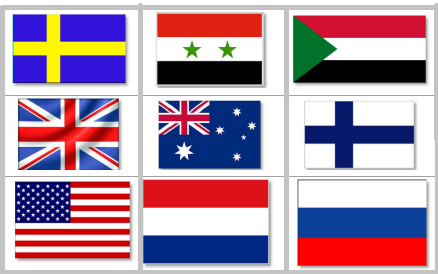

## Pros and Cons of Bag of Words Algorithm

### Pros:
1. **Simplicity**: The Bag of Words algorithm is straightforward to implement and understand. It converts images into a collection of visual words, making it easy to process.
2. **Efficiency**: Bag of Words can be computationally efficient, as it can describe with a small amount of information significant characteristics of the flag, such as colors, structure, shapes, etc.

### Cons:
1. **Loss of Spatial Information**: Bag of Words disregards the spatial arrangement of features within an image. For flags, the arrangement of colors and patterns is crucial for correct identification, and ignoring this can lead to incorrect classifications.
2. **Fixed Vocabulary**: The effectiveness of Bag of Words depends on the predefined set of visual words. If the vocabulary is not comprehensive enough, important features might be missed, leading to reduced accuracy.
3. **Feature Overlap**: Different flags might share similar colors and patterns, leading to overlapping visual words that can confuse the classifier.


4.2. Danny is interested to design a dogs classifier. He has dataset of RGB images of 3 types of dogs in dimensions of 64X64 (i.e. the dimension of each image is 3X64X64). In the following table, the network architecture is defined in the leftmost column. You need to fill in the two additional columns: In the middle column fill the output dimensions and in the right column the number of learnd parameters (weights). The answer should be written as multiples (for example: 128 × 128 × 3 ).No need to consider bias. 

  **Conv7-N**: A convolution layer with N neurons, each one has dimensions of 7 × 7 × D where D is the volume depth activation in the previous layer. Padding = 2 and  Stride = 1.

  **POOL2**: 2 × 2  Max-Pooling activation with Stride=2. If the input to the layer is an odd number, round it down.

  **FC-N**: Fully Connected layer with N neurons. 

\begin{array}{|c|c|} \hline
\text{Layer} & \text{Output dimensions}  & \text{Number of parameters (weights)}  \\ \hline
INPUT & 64 × 64 × 3 & 0  \\ \hline
CONV7-16 & 62 × 62 × 16 &  16 × (7×7) × 3 \\\hline
POOL2 & 31 × 31 × 16 & 0  \\ \hline
CONV7-32 & 29 × 29 × 32 &  32 × (7×7) × 16 \\ \hline
POOL2 & 14 × 14 × 32 &  0 \\ \hline
FC-3 & 3 & 14 × 14 × 32 × 3  \\ \hline
\end{array}

3. You have built a neural network model for a classification problem and observed that it is overfitting. 


a. For each of the following factors, determine if it could be contributing to the overfitting, and explain how. If it is a contributing factor, suggest a method to mitigate its impact.

1. **Learning Rate (Lr)**
   - **Contribution to Overfitting**: A very low learning rate can lead to overfitting because the model might learn the noise in the training data as it converges very slowly or to stuck in local minimum of the train set.
   - **Mitigation Method**: Use a moderate learning rate. Use techniques such as learning rate decay or adaptive learning rate optimizers like Adam.

2. **Batch Size**
   - **Contribution to Overfitting**: Very small batch sizes can result in noisy gradient estimates, which can lead to overfitting.
   - **Mitigation Method**: Increase the batch size. However, balance is key as very large batch sizes can also cause the model to miss finer details.

3. **Number of Layers**
   - **Contribution to Overfitting**: Having too many layers can make the model too complex, causing it to fit the training data very closely.
   - **Mitigation Method**: Reduce the number of layers or use techniques like regularization (L2 or L1), dropout, or early stopping.

4. **Training Set Size**
   - **Contribution to Overfitting**: A small training set size can lead to overfitting because the model has fewer examples to generalize from.
   - **Mitigation Method**: Increase the training set size by collecting more data or using data augmentation techniques.

5. **Test Set Size**
   - **Contribution to Overfitting**: The test set size doesn't directly contribute to overfitting, but a small test set size can give unreliable estimates of the model's performance.
   - **Mitigation Method**: Ensure a sufficiently large test set to reliably evaluate the model's generalization performance.

b. After conducting multiple trials with your model, you decided to add dropout to it. Describe the role of dropout during training and testing, and explain how it helps in reducing overfitting.

- **During Training**: Dropout forces the network not to count just on few bold neurons, by randomly dropping neurones in train time, it forces the network to learn more connections. That helps in making the model more robust and prevents it from relying too heavily on any individual node.
- **During Testing**: Dropout is not applied. Instead, the weights are scaled down by the dropout rate to account for the missing units during training.


